<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# TS4
#### Adrián Pablo Cafa

In [1]:
#######################################################################################################################
#%% Configuración e inicio de la simulación
#######################################################################################################################
 
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
 
# Datos generales de la simulación
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
 
# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling
 
# Datos del ADC
B = 4 # bits
Vf = 2 # Volts
q = Vf/2**B # Volts
 
# datos del ruido
kn = 10
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral


 
#######################################################################################################################
#%% Acá arranca la simulación

#Grilla de sampleo temporal:

tt = np.linspace(0,(N-1)*ts,N)
tt_os = np.linspace(0,(N-1)*ts,N_os)

#Grilla de sampleo frecuencial:
ff = np.linspace(0,(N-1)*df,N)
ff_os = np.linspace(0,(N-1)*df,N_os)    

analog_sig = np.sin(2*np.pi*1*df*tt_os)
analog_sig = analog_sig / np.sqrt(np.var(analog_sig))

# Generacion de la señal de interferencia incorrelada

nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)

# Señal de entrada al ADC (señal + ruido):

sr = analog_sig + nn


# muestro la señal, 1 cada Over Sampling muestras
sr = sr[::over_sampling]

# Cuantizo la señal muestreada
srq = q * np.round(sr/q)

# ruido de cuantizacion (a la señal cuantizada le resto la señal en si)
nq = srq - sr


## Presentación gráfica de los resultados

## Analizar para una de las siguientes configuraciones B = ̣{4, 8 y 16} bits, kn={1/10,1,10}

<Figure size 432x288 with 0 Axes>

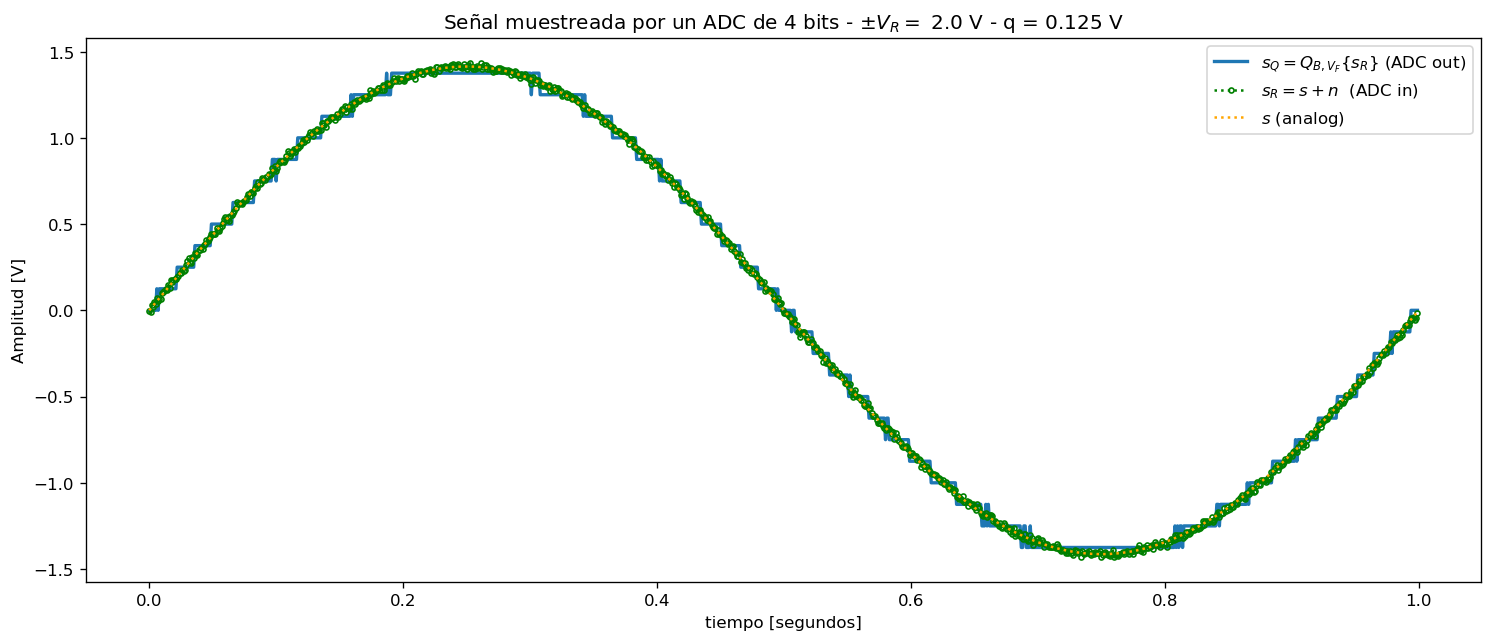

SNR = 29.013242 in dB


<Figure size 432x288 with 0 Axes>

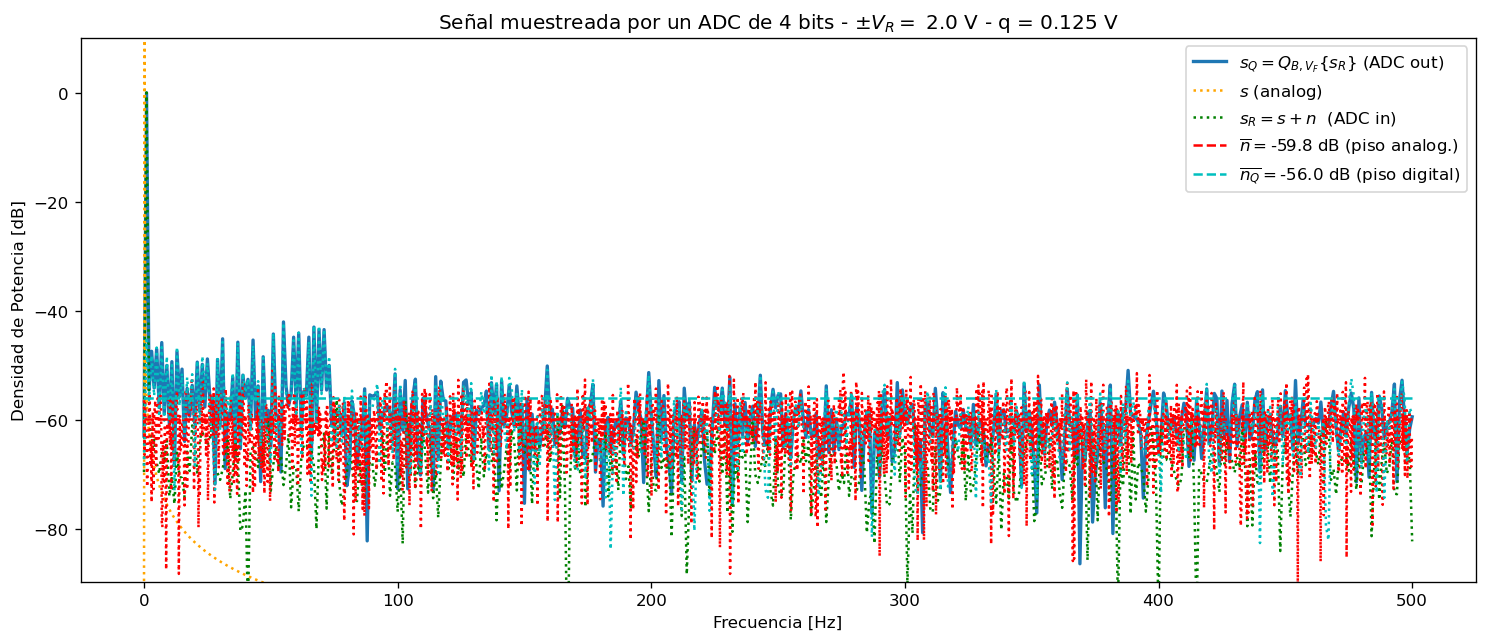

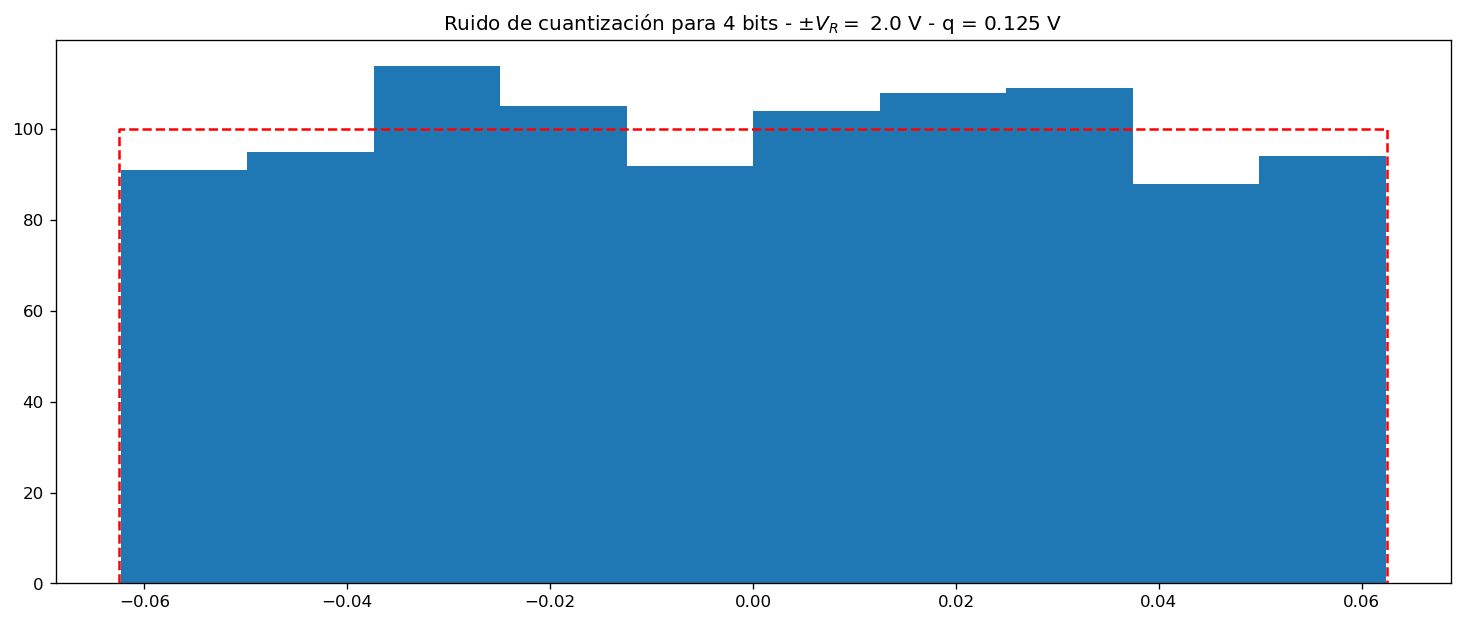

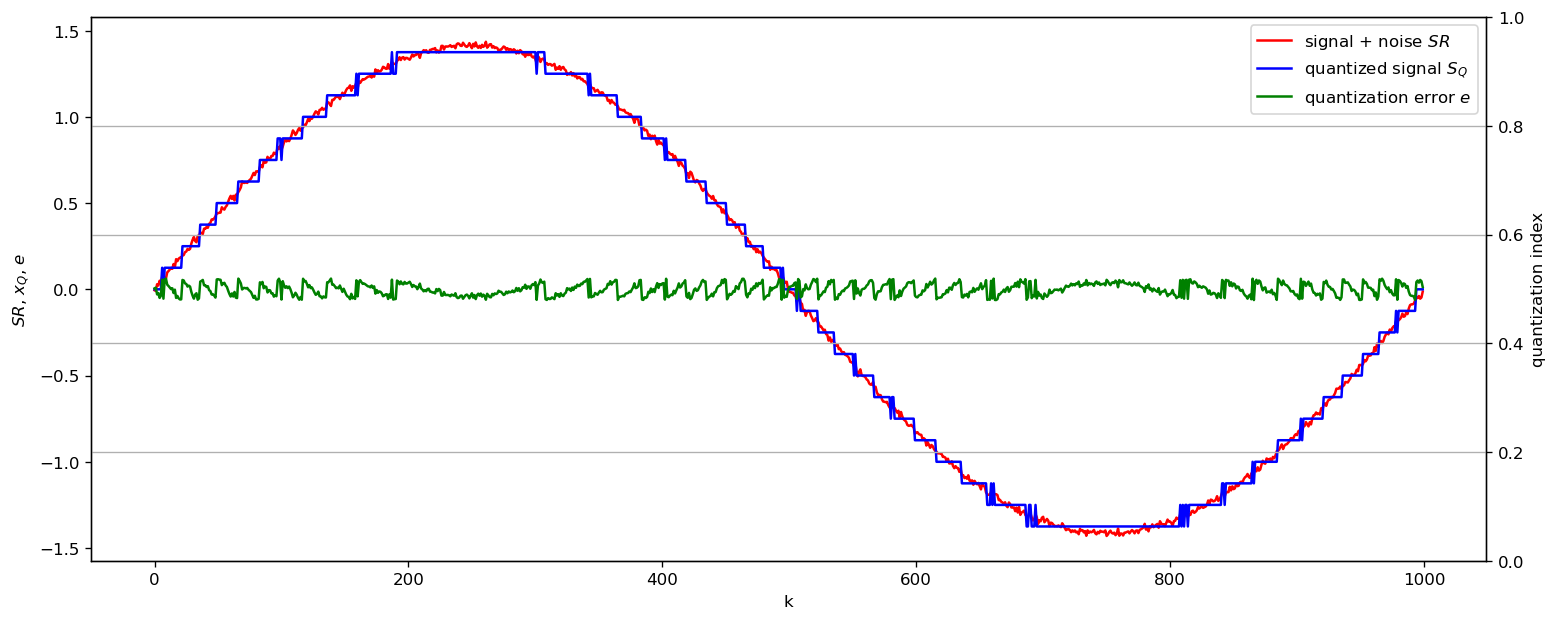

In [2]:
from matplotlib.pyplot import figure

# b.1) B=4 , Kn= 1/10 
B = 4
kn = 1/10
q = Vf/2**B # Volts
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)
sr = analog_sig + nn
sr = sr[::over_sampling]
srq = q * np.round(sr/q)
nq = srq - sr

plt.close('all')
 
plt.figure(4)
figure(figsize=(15, 6), dpi=120)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(5)
figure(figsize=(15, 6), dpi=120)
ft_As = 1/N*np.fft.fft(analog_sig,axis=0)
ft_SR = 1/N*np.fft.fft(sr,axis=0)
ft_Nq = 1/N*np.fft.fft(nq,axis=0)
ft_Nn = 1/N*np.fft.fft(nn,axis=0)
ft_Srq =1/N*np.fft.fft(srq,axis=0)

bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(6)
figure(figsize=(15, 6), dpi=120)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))


# Agregado:

# señal + ruido:
x = sr
# señal con cuantizaion:
xQ = srq
# señal de error:
e = xQ - x

fig, ax1 = plt.subplots(figsize=(15, 6), dpi=120)
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal + noise $SR$')
ax1.plot(xQ, 'b', label=r'quantized signal $S_Q$')
ax1.plot(e, 'g', label=r'quantization error $e$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR$, $S_Q$, $e$')
ax1.legend()
ax2.set_ylabel('quantization index')
ax2.grid()

SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' % SNR)
    
    

<Figure size 432x288 with 0 Axes>

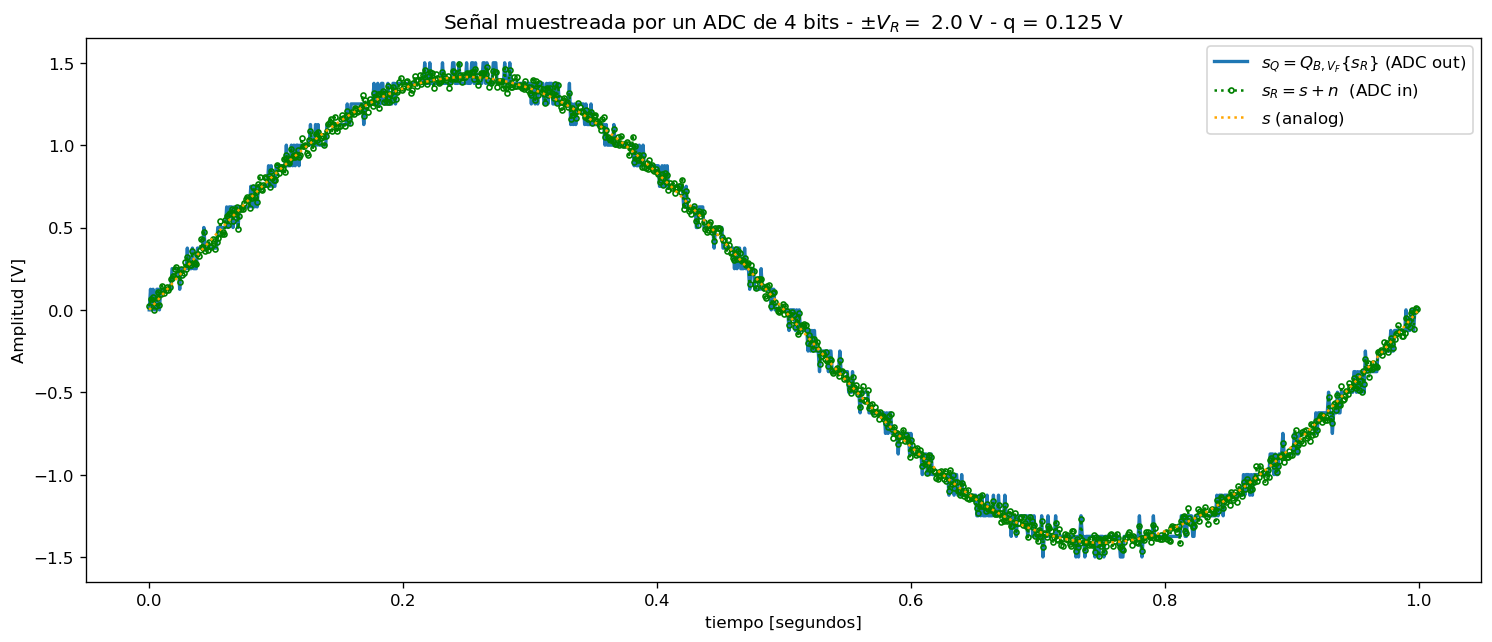

SNR = 29.167108 in dB


<Figure size 432x288 with 0 Axes>

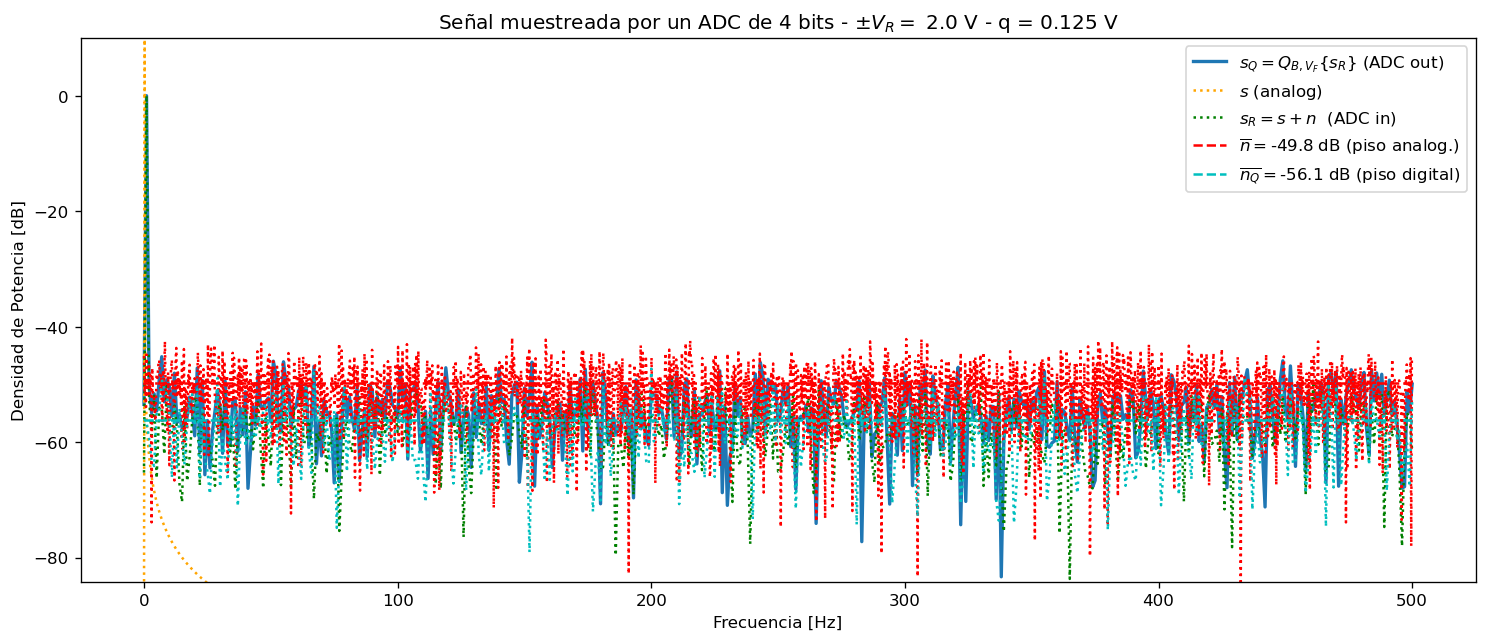

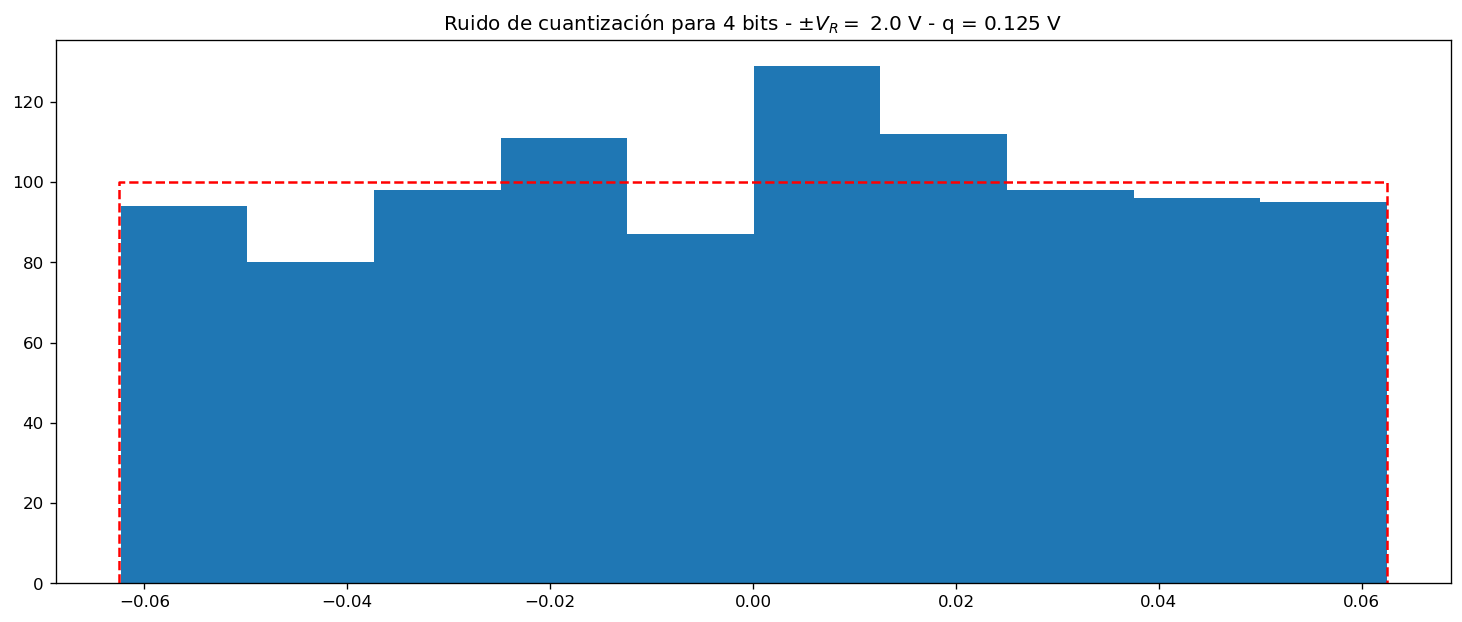

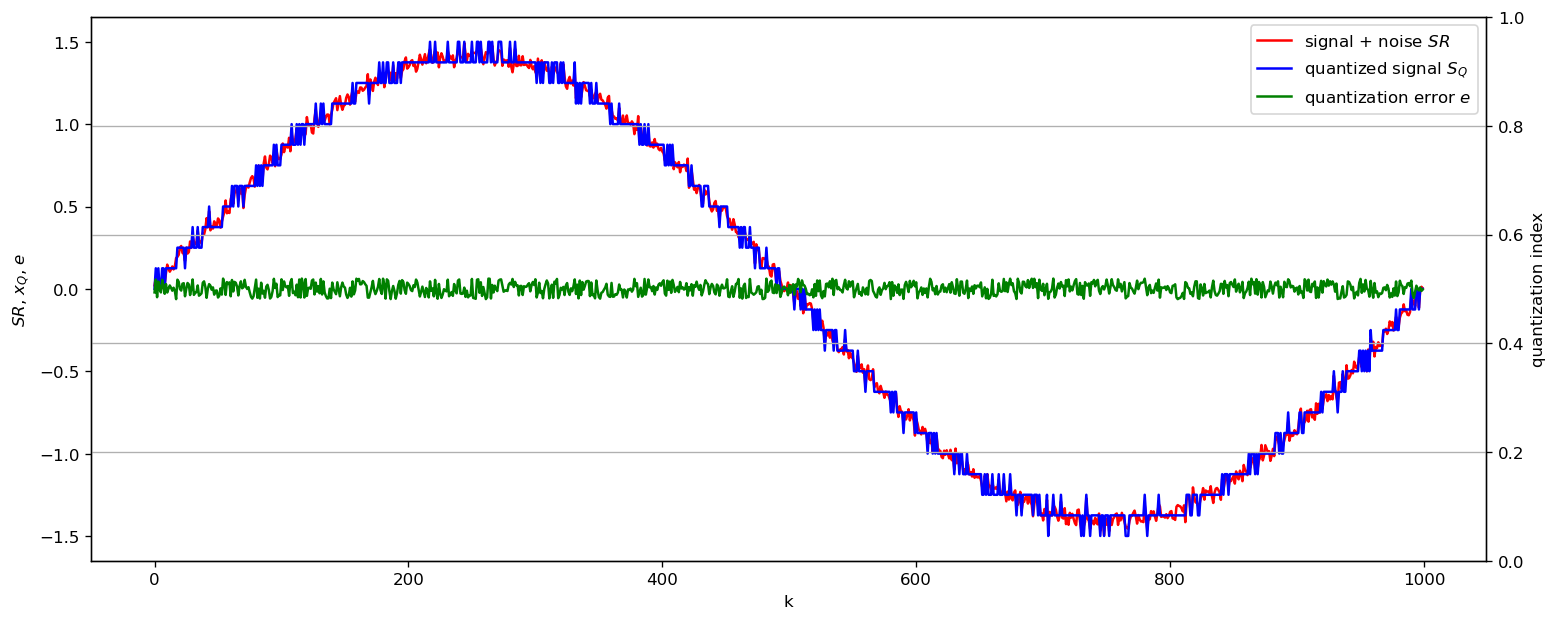

In [3]:
# b.2) B=4 , Kn= 1 
B = 4
kn = 1
q = Vf/2**B # Volts
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)
sr = analog_sig + nn
sr = sr[::over_sampling]
srq = q * np.round(sr/q)
nq = srq - sr

plt.close('all')
 
plt.figure(7)
figure(figsize=(15, 6), dpi=120)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(8)
figure(figsize=(15, 6), dpi=120)
ft_As = 1/N*np.fft.fft(analog_sig,axis=0)
ft_SR = 1/N*np.fft.fft(sr,axis=0)
ft_Nq = 1/N*np.fft.fft(nq,axis=0)
ft_Nn = 1/N*np.fft.fft(nn,axis=0)
ft_Srq =1/N*np.fft.fft(srq,axis=0)

bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(9)
figure(figsize=(15, 6), dpi=120)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

# Agregado:

# señal + ruido:
x = sr
# señal con cuantizaion:
xQ = srq
# señal de error:
e = xQ - x

fig, ax1 = plt.subplots(figsize=(15, 6), dpi=120)
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal + noise $SR$')
ax1.plot(xQ, 'b', label=r'quantized signal $S_Q$')
ax1.plot(e, 'g', label=r'quantization error $e$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR$, $S_Q$, $e$')
ax1.legend()
ax2.set_ylabel('quantization index')
ax2.grid()

SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' % SNR)
    

<Figure size 432x288 with 0 Axes>

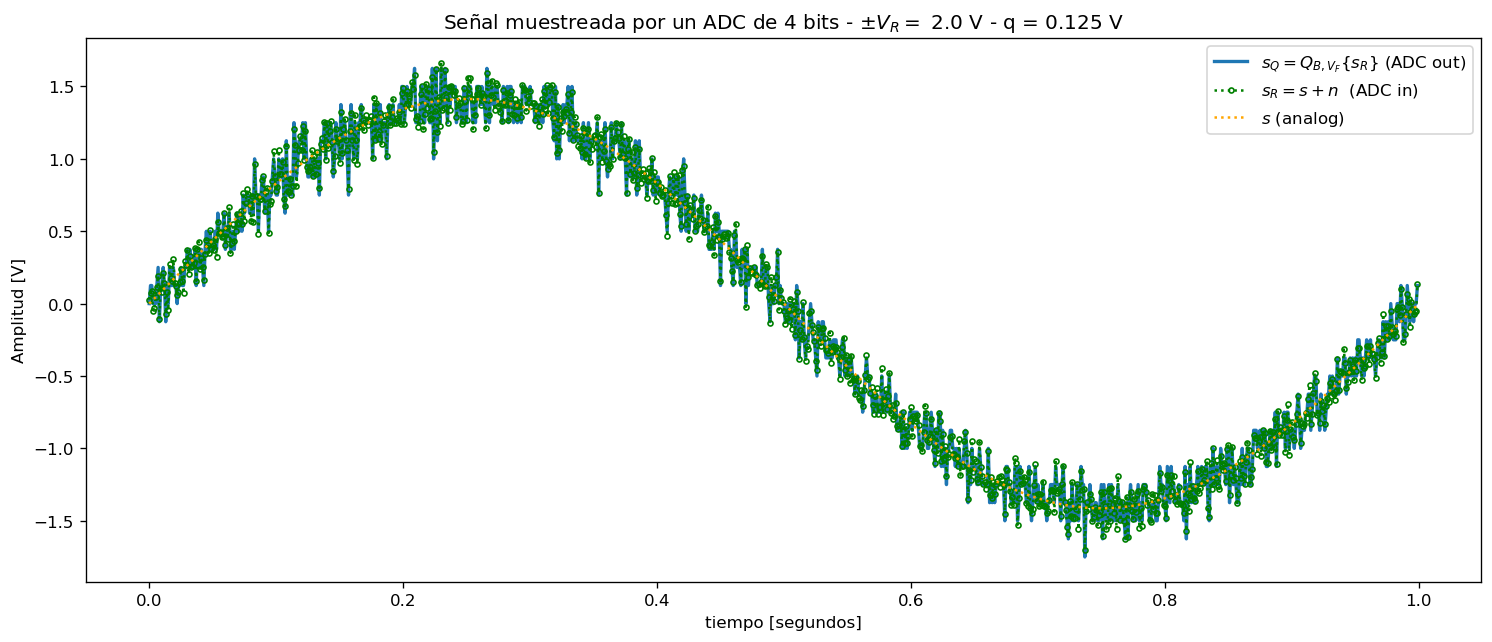

SNR = 28.835920 in dB


<Figure size 432x288 with 0 Axes>

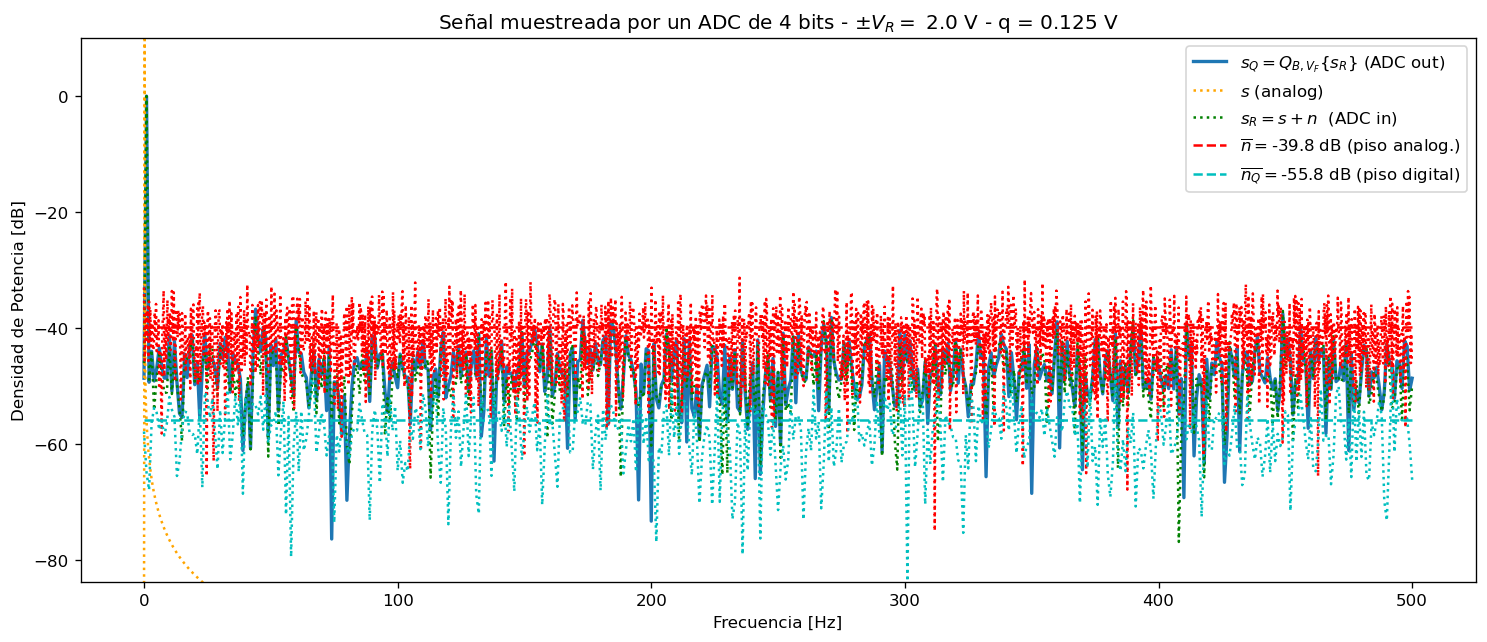

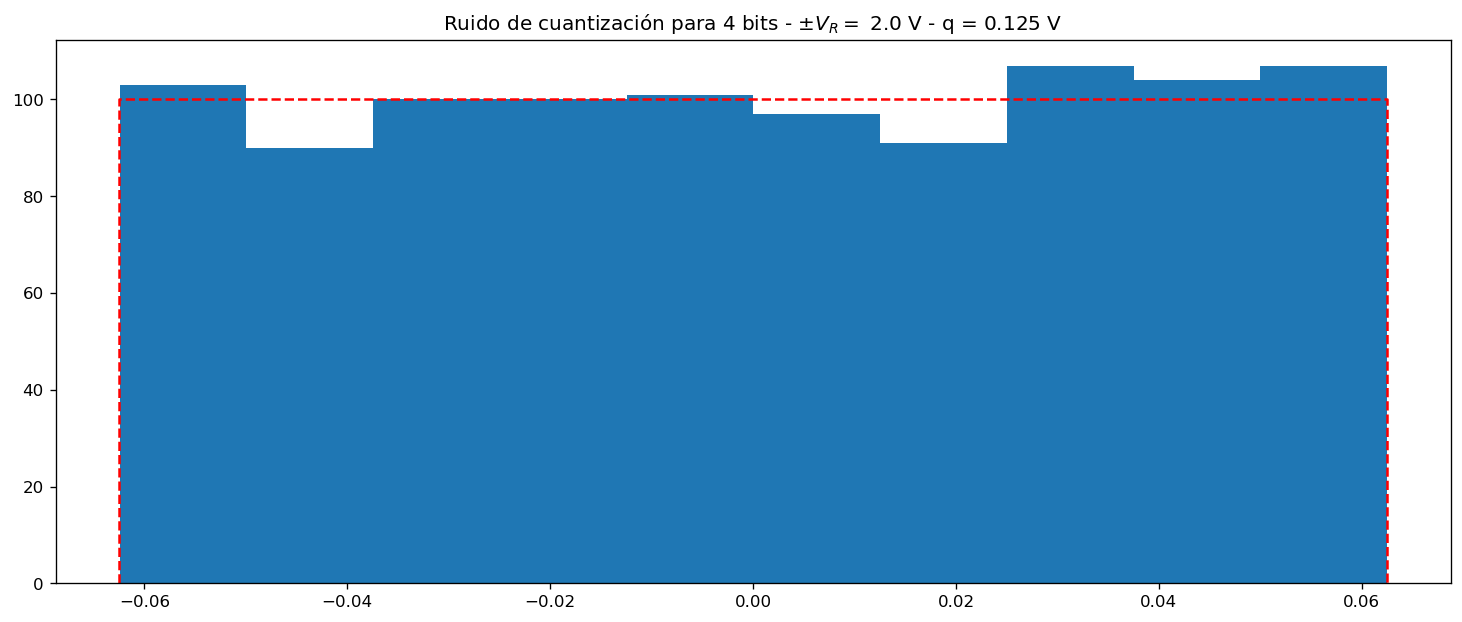

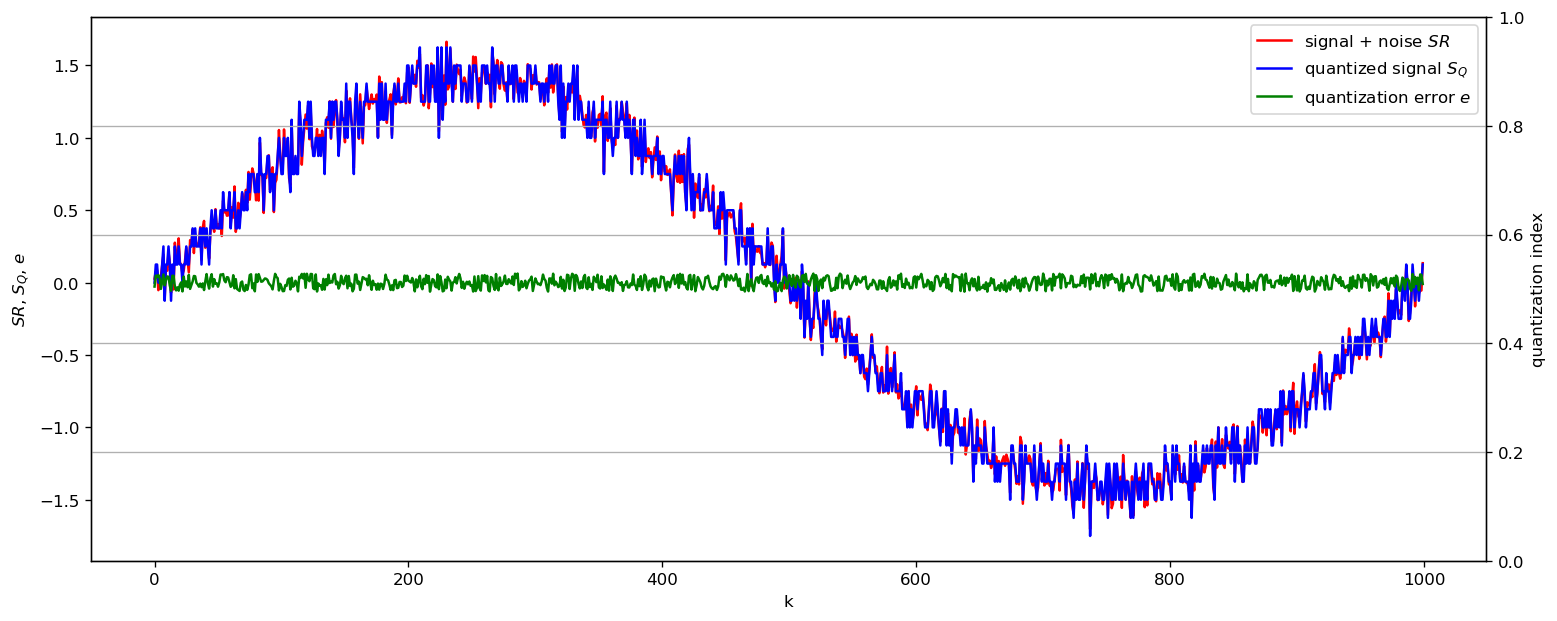

In [7]:
# b.3) B=4 , Kn= 10 
B = 4
kn = 10
q = Vf/2**B # Volts
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)
sr = analog_sig + nn
sr = sr[::over_sampling]
srq = q * np.round(sr/q)
nq = srq - sr

plt.close('all')
 
plt.figure(10)
figure(figsize=(15, 6), dpi=120)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(11)
figure(figsize=(15, 6), dpi=120)
ft_As = 1/N*np.fft.fft(analog_sig,axis=0)
ft_SR = 1/N*np.fft.fft(sr,axis=0)
ft_Nq = 1/N*np.fft.fft(nq,axis=0)
ft_Nn = 1/N*np.fft.fft(nn,axis=0)
ft_Srq =1/N*np.fft.fft(srq,axis=0)

bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(12)
figure(figsize=(15, 6), dpi=120)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

# Agregado:

# señal + ruido:
x = sr
# señal con cuantizaion:
xQ = srq
# señal de error:
e = xQ - x

fig, ax1 = plt.subplots(figsize=(15, 6), dpi=120)
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal + noise $SR$')
ax1.plot(xQ, 'b', label=r'quantized signal $S_Q$')
ax1.plot(e, 'g', label=r'quantization error $e$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR$, $S_Q$, $e$')
ax1.legend()
ax2.set_ylabel('quantization index')
ax2.grid()

SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' % SNR)
    

<Figure size 432x288 with 0 Axes>

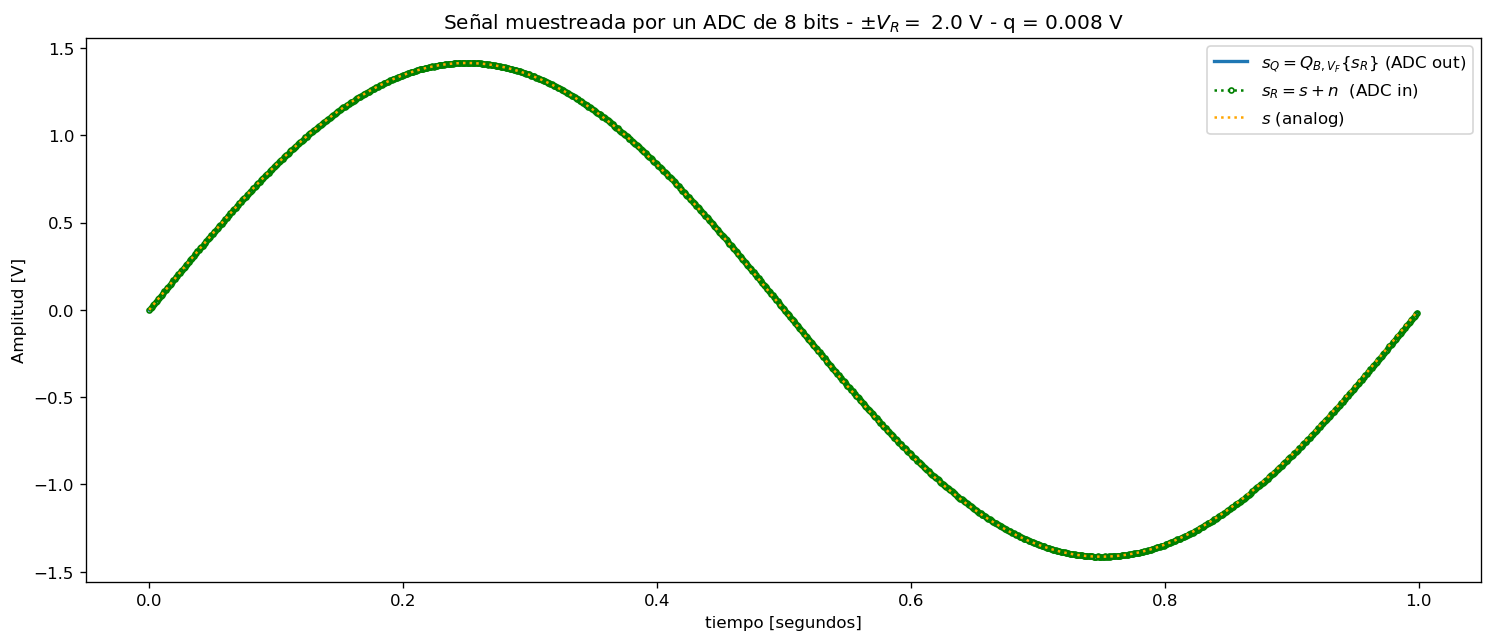

SNR = 52.913248 in dB


<Figure size 432x288 with 0 Axes>

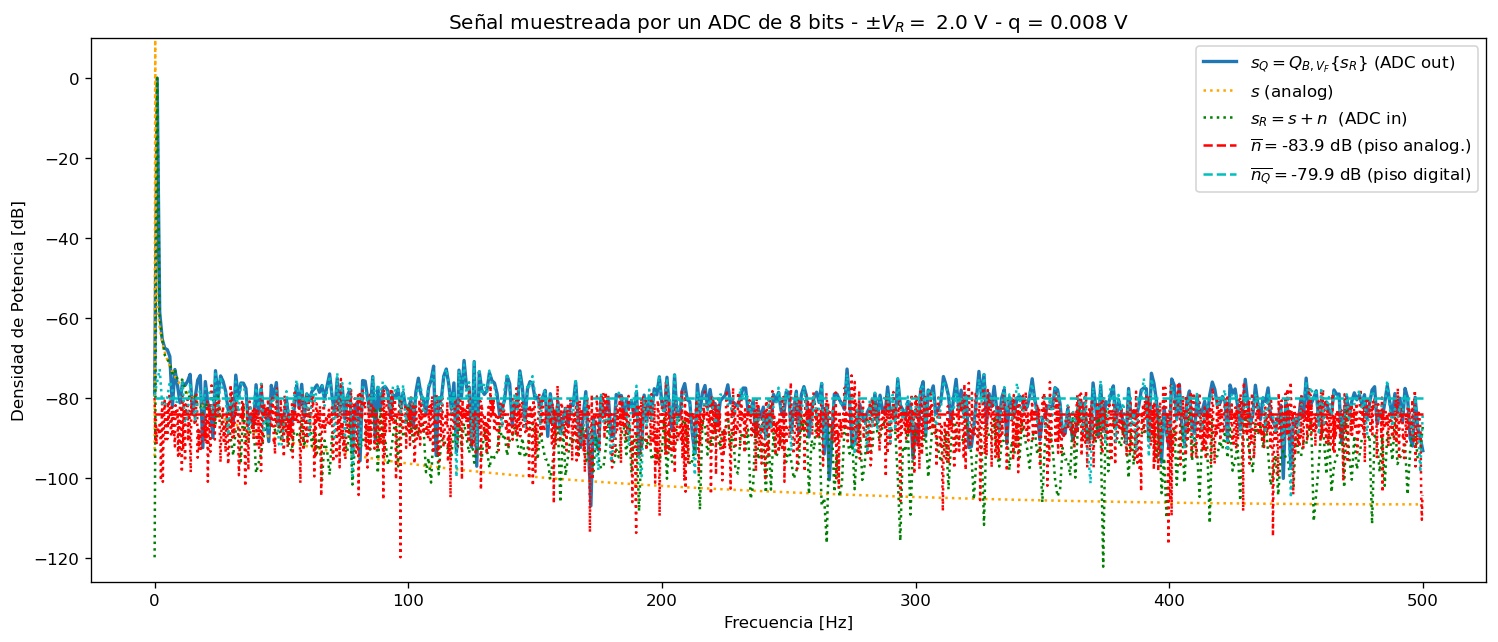

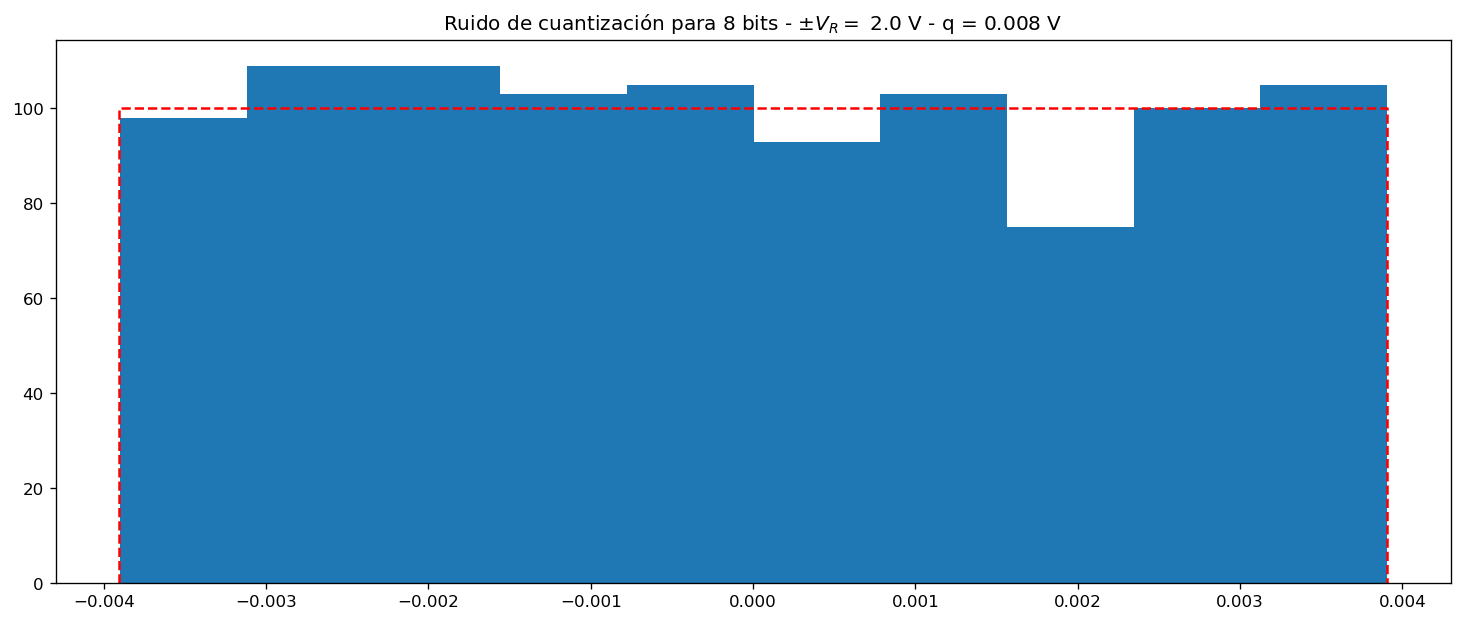

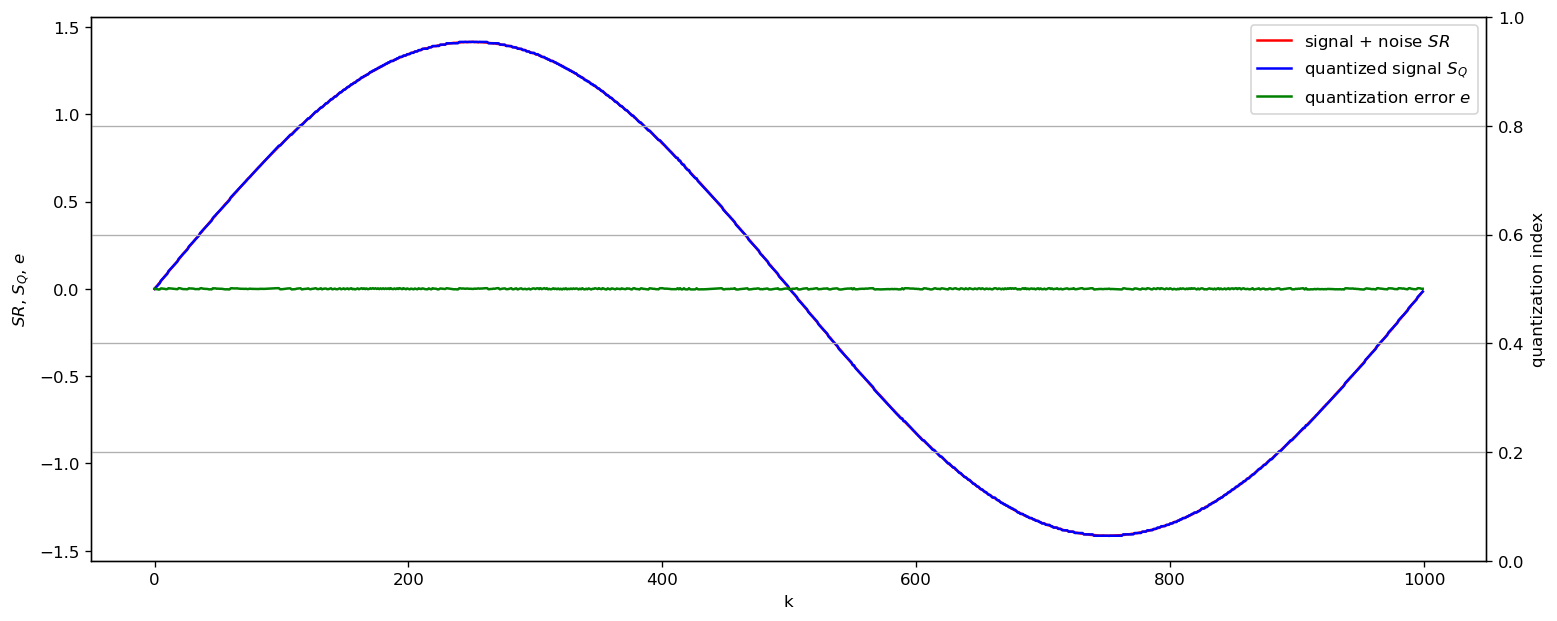

In [8]:
# b.4) B=8 , Kn= 1/10 
B = 8
kn = 1/10
q = Vf/2**B # Volts
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)
sr = analog_sig + nn
sr = sr[::over_sampling]
srq = q * np.round(sr/q)
nq = srq - sr

plt.close('all')
 
plt.figure(13)
figure(figsize=(15, 6), dpi=120)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(14)
figure(figsize=(15, 6), dpi=120)
ft_As = 1/N*np.fft.fft(analog_sig,axis=0)
ft_SR = 1/N*np.fft.fft(sr,axis=0)
ft_Nq = 1/N*np.fft.fft(nq,axis=0)
ft_Nn = 1/N*np.fft.fft(nn,axis=0)
ft_Srq =1/N*np.fft.fft(srq,axis=0)

bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(15)
figure(figsize=(15, 6), dpi=120)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

# Agregado:

# señal + ruido:
x = sr
# señal con cuantizaion:
xQ = srq
# señal de error:
e = xQ - x

fig, ax1 = plt.subplots(figsize=(15, 6), dpi=120)
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal + noise $SR$')
ax1.plot(xQ, 'b', label=r'quantized signal $S_Q$')
ax1.plot(e, 'g', label=r'quantization error $e$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR$, $S_Q$, $e$')
ax1.legend()
ax2.set_ylabel('quantization index')
ax2.grid()

SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' % SNR)
    

<Figure size 432x288 with 0 Axes>

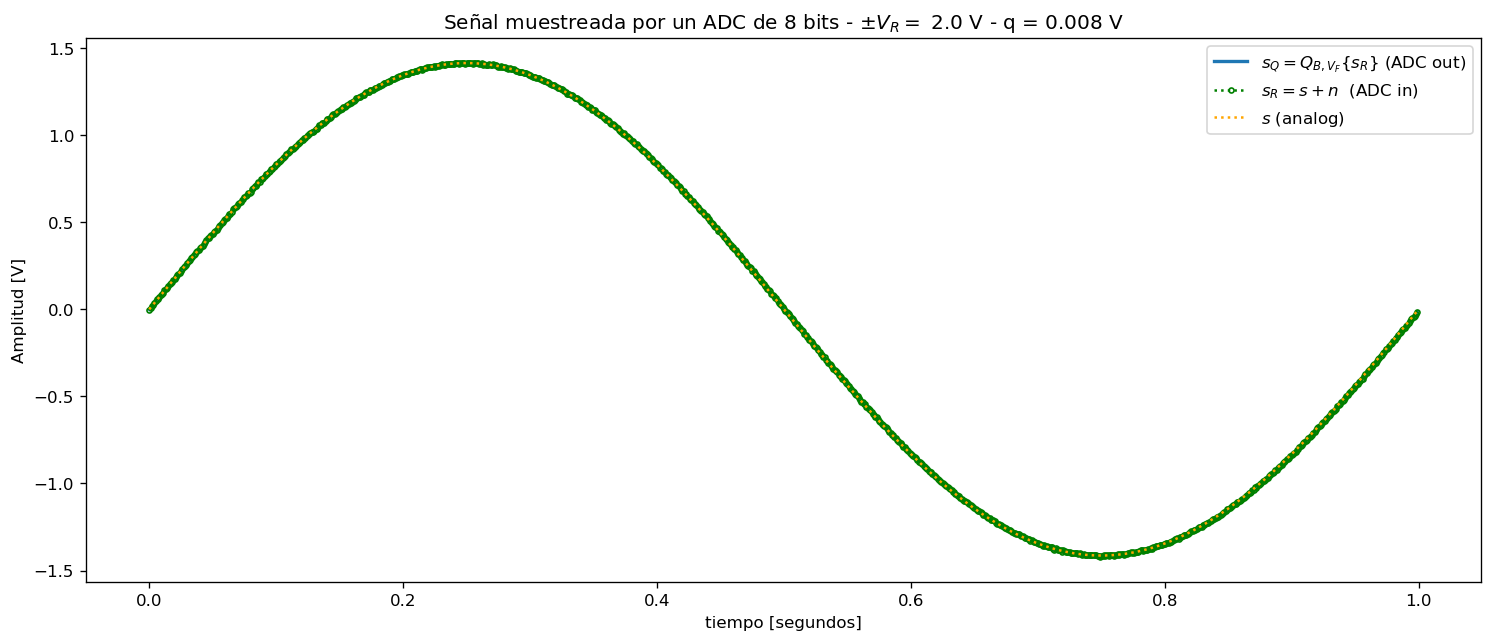

SNR = 53.015420 in dB


<Figure size 432x288 with 0 Axes>

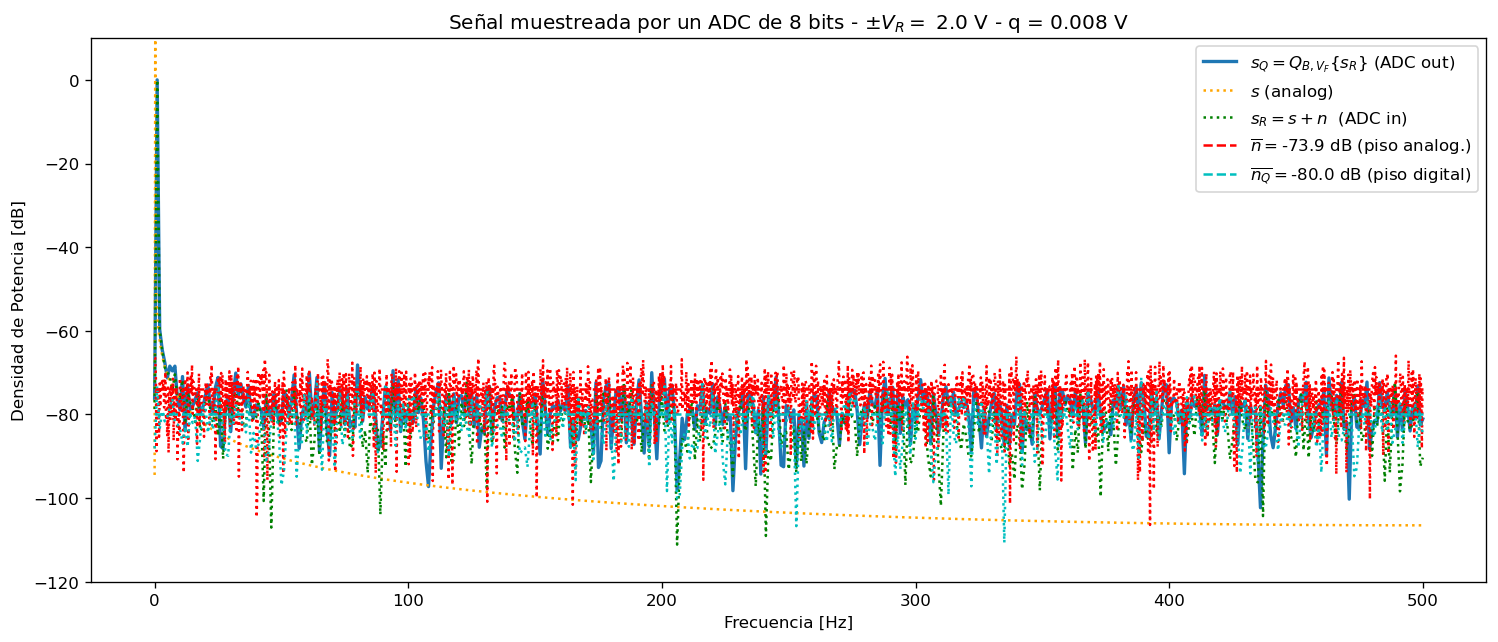

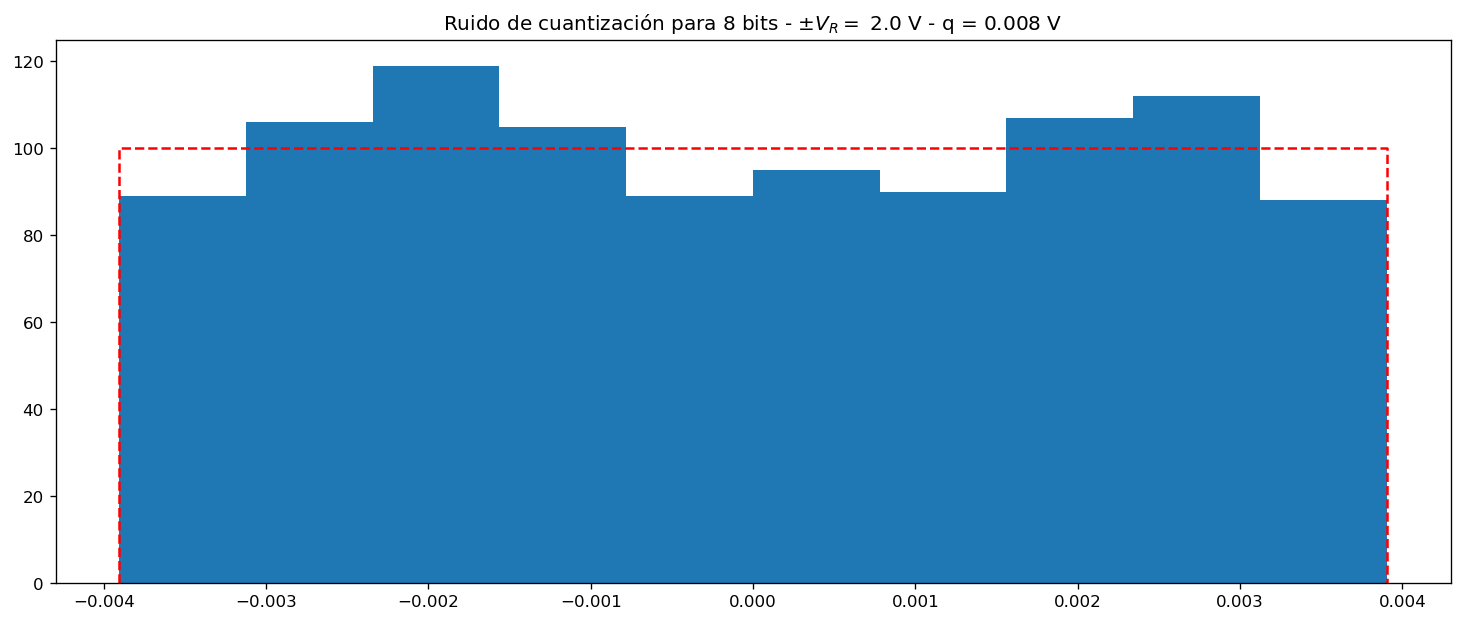

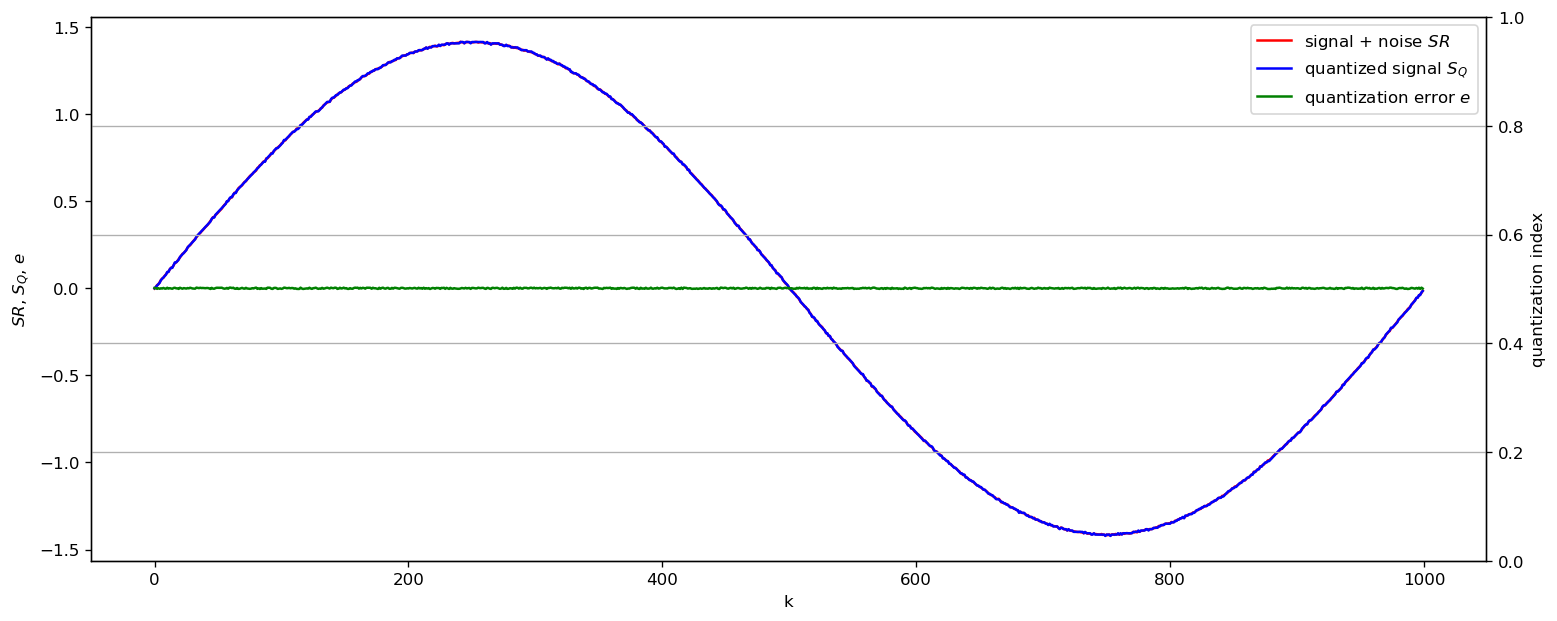

In [9]:
# b.5) B=8 , Kn= 1 
B = 8
kn = 1
q = Vf/2**B # Volts
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)
sr = analog_sig + nn
sr = sr[::over_sampling]
srq = q * np.round(sr/q)
nq = srq - sr

plt.close('all')
 
plt.figure(16)
figure(figsize=(15, 6), dpi=120)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(17)
figure(figsize=(15, 6), dpi=120)
ft_As = 1/N*np.fft.fft(analog_sig,axis=0)
ft_SR = 1/N*np.fft.fft(sr,axis=0)
ft_Nq = 1/N*np.fft.fft(nq,axis=0)
ft_Nn = 1/N*np.fft.fft(nn,axis=0)
ft_Srq =1/N*np.fft.fft(srq,axis=0)

bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(18)
figure(figsize=(15, 6), dpi=120)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))


# Agregado:

# señal + ruido:
x = sr
# señal con cuantizaion:
xQ = srq
# señal de error:
e = xQ - x

fig, ax1 = plt.subplots(figsize=(15, 6), dpi=120)
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal + noise $SR$')
ax1.plot(xQ, 'b', label=r'quantized signal $S_Q$')
ax1.plot(e, 'g', label=r'quantization error $e$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR$, $S_Q$, $e$')
ax1.legend()
ax2.set_ylabel('quantization index')
ax2.grid()

SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' % SNR)
    

<Figure size 432x288 with 0 Axes>

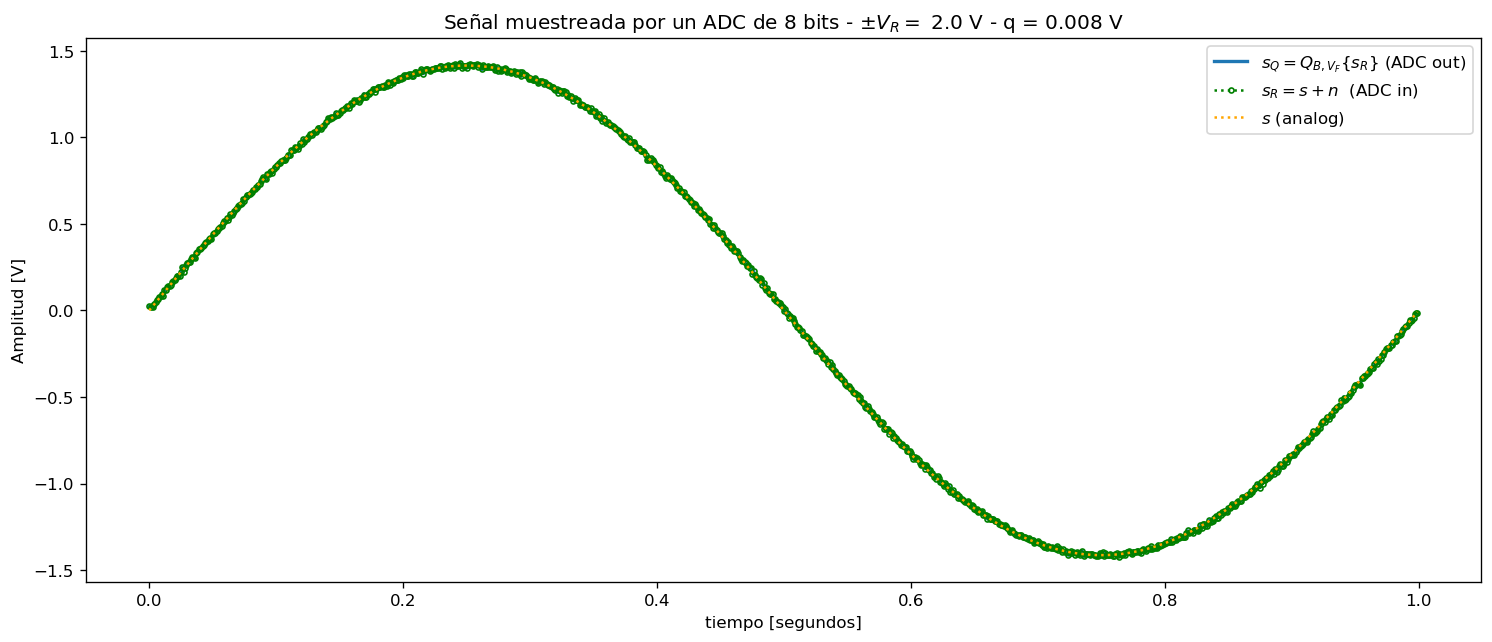

SNR = 52.933598 in dB


<Figure size 432x288 with 0 Axes>

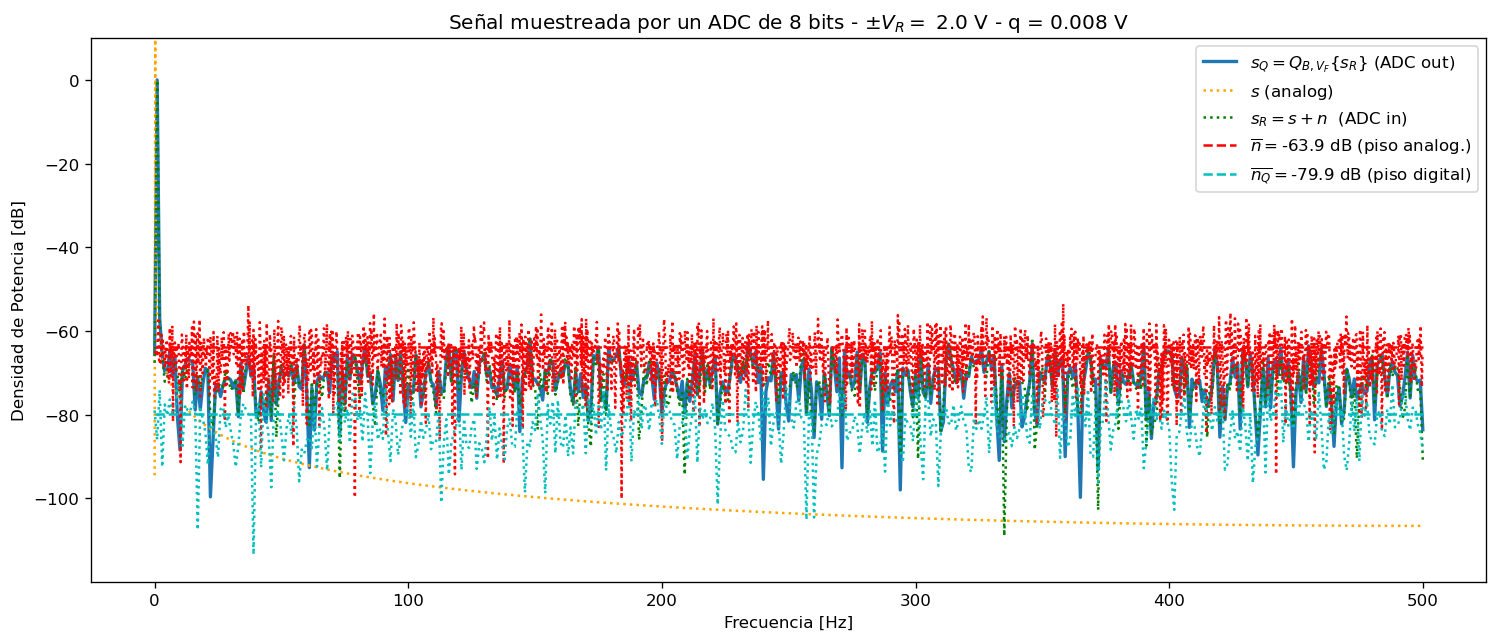

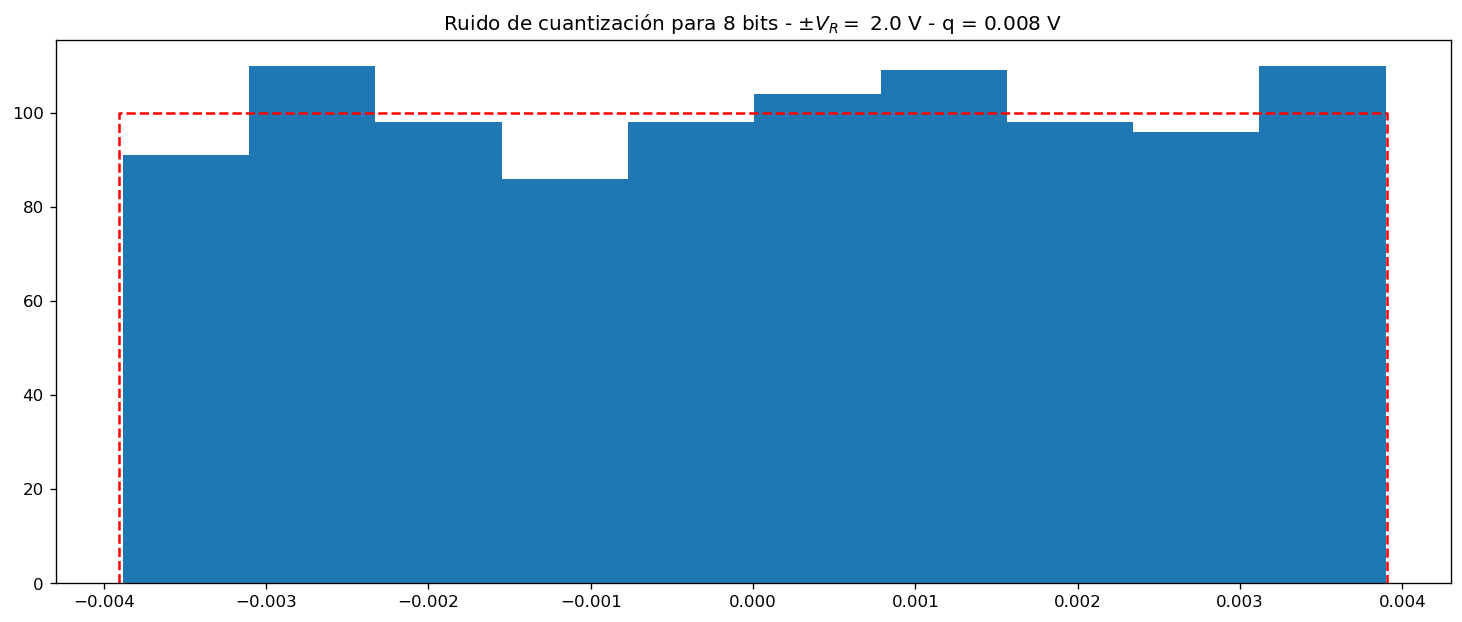

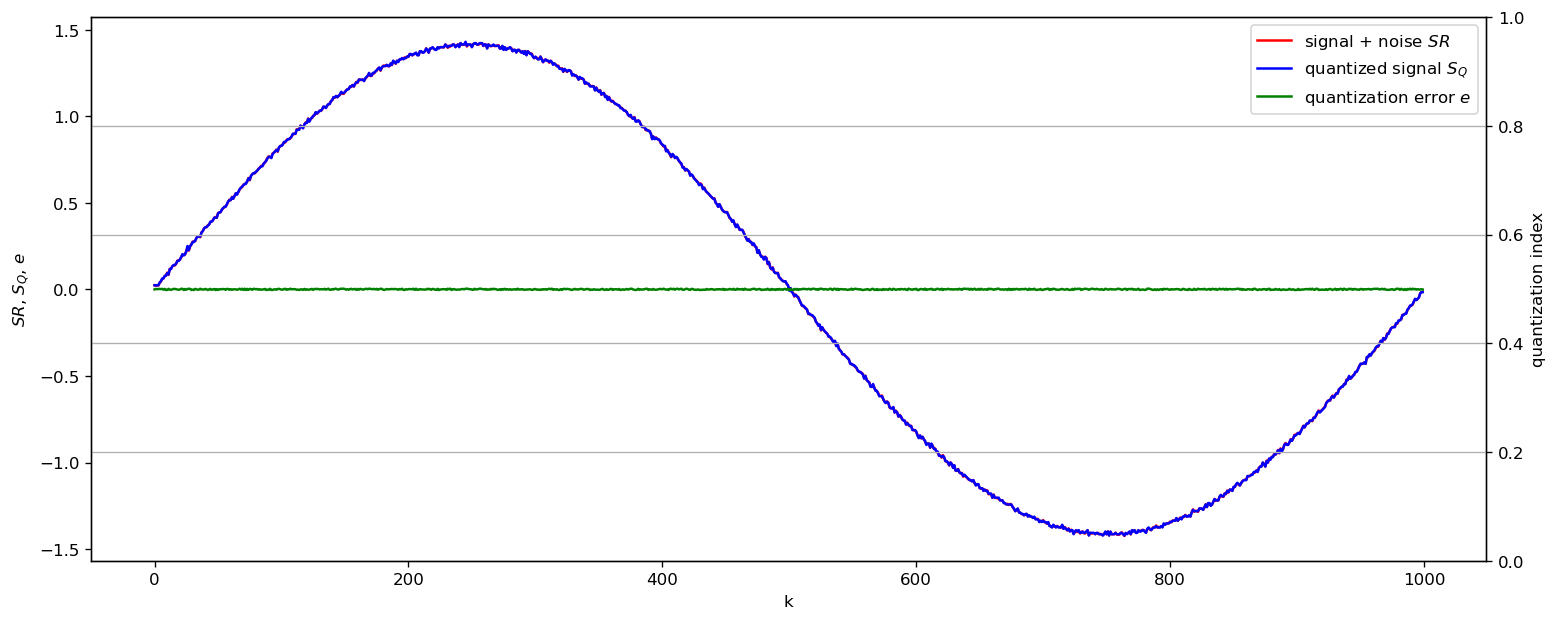

In [10]:
# b.6) B=8 , Kn= 10
B = 8
kn = 10
q = Vf/2**B # Volts
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)
sr = analog_sig + nn
sr = sr[::over_sampling]
srq = q * np.round(sr/q)
nq = srq - sr

plt.close('all')
 
plt.figure(19)
figure(figsize=(15, 6), dpi=120)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(20)
figure(figsize=(15, 6), dpi=120)
ft_As = 1/N*np.fft.fft(analog_sig,axis=0)
ft_SR = 1/N*np.fft.fft(sr,axis=0)
ft_Nq = 1/N*np.fft.fft(nq,axis=0)
ft_Nn = 1/N*np.fft.fft(nn,axis=0)
ft_Srq =1/N*np.fft.fft(srq,axis=0)

bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(21)
figure(figsize=(15, 6), dpi=120)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

# Agregado:

# señal + ruido:
x = sr
# señal con cuantizaion:
xQ = srq
# señal de error:
e = xQ - x

fig, ax1 = plt.subplots(figsize=(15, 6), dpi=120)
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal + noise $SR$')
ax1.plot(xQ, 'b', label=r'quantized signal $S_Q$')
ax1.plot(e, 'g', label=r'quantization error $e$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR$, $S_Q$, $e$')
ax1.legend()
ax2.set_ylabel('quantization index')
ax2.grid()

SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' % SNR)
    

<Figure size 432x288 with 0 Axes>

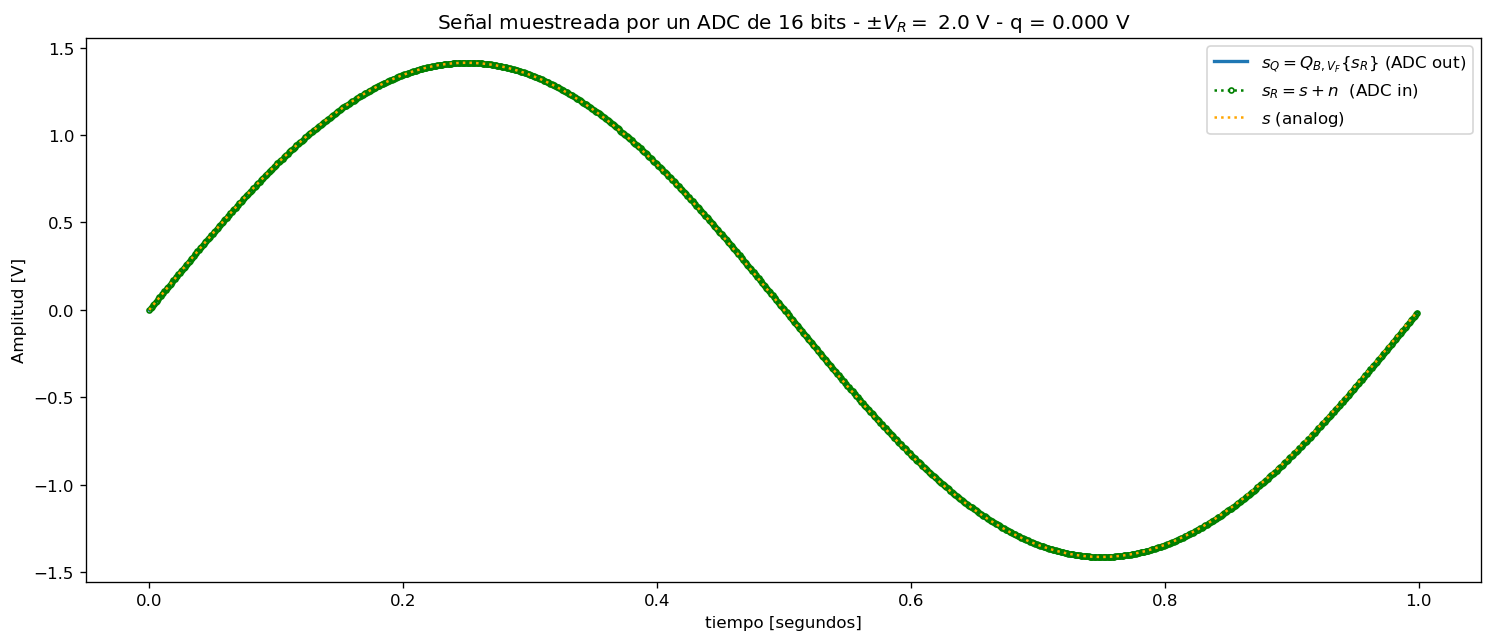

SNR = 101.005799 in dB


<Figure size 432x288 with 0 Axes>

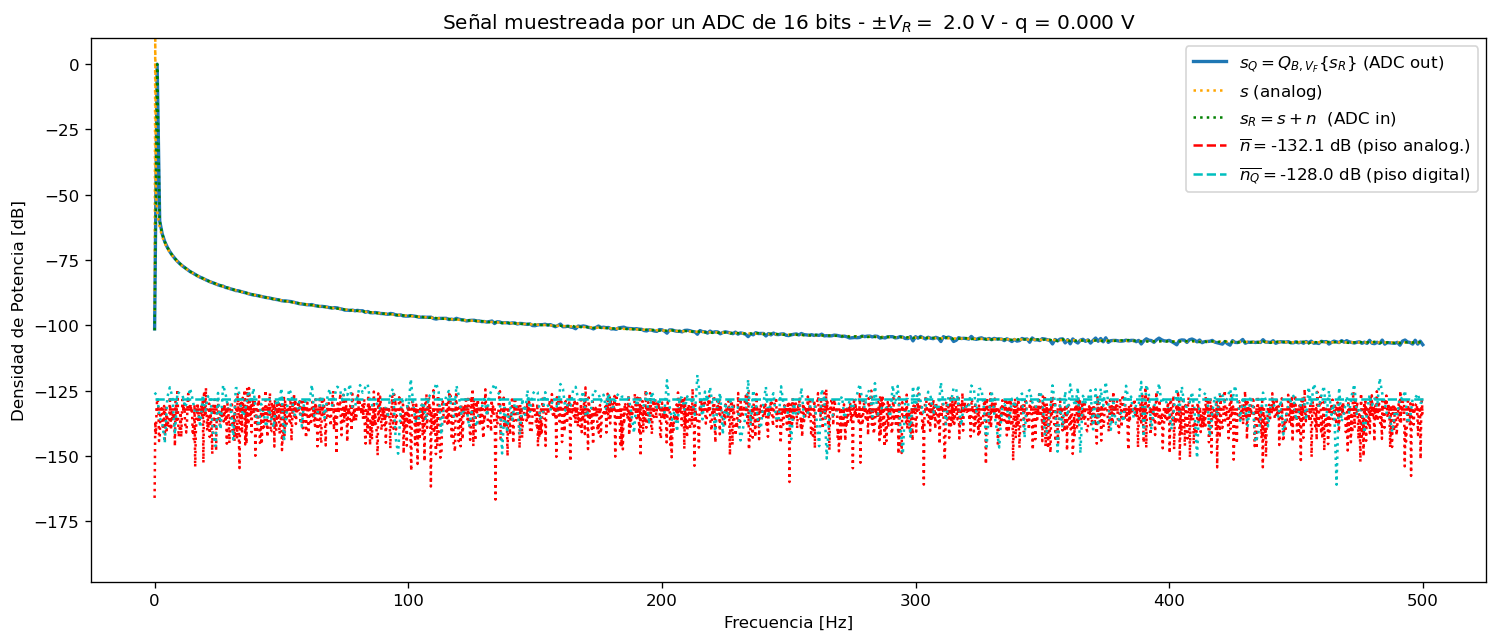

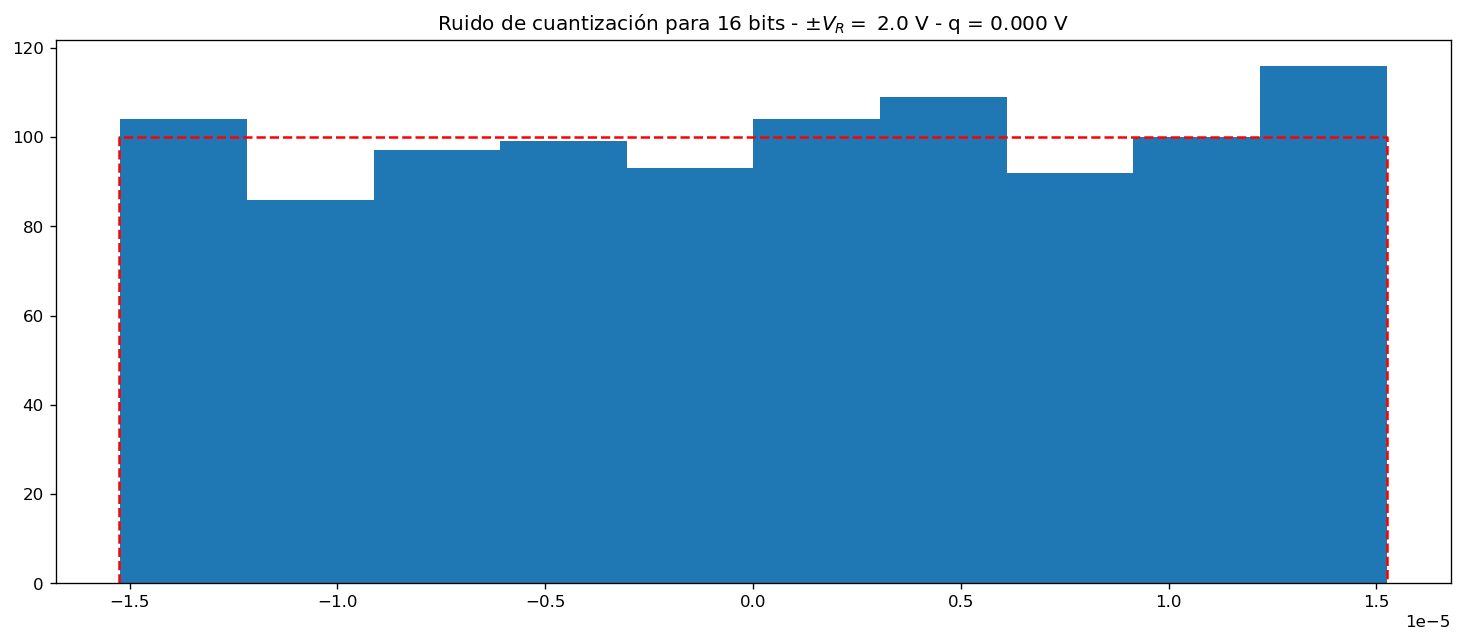

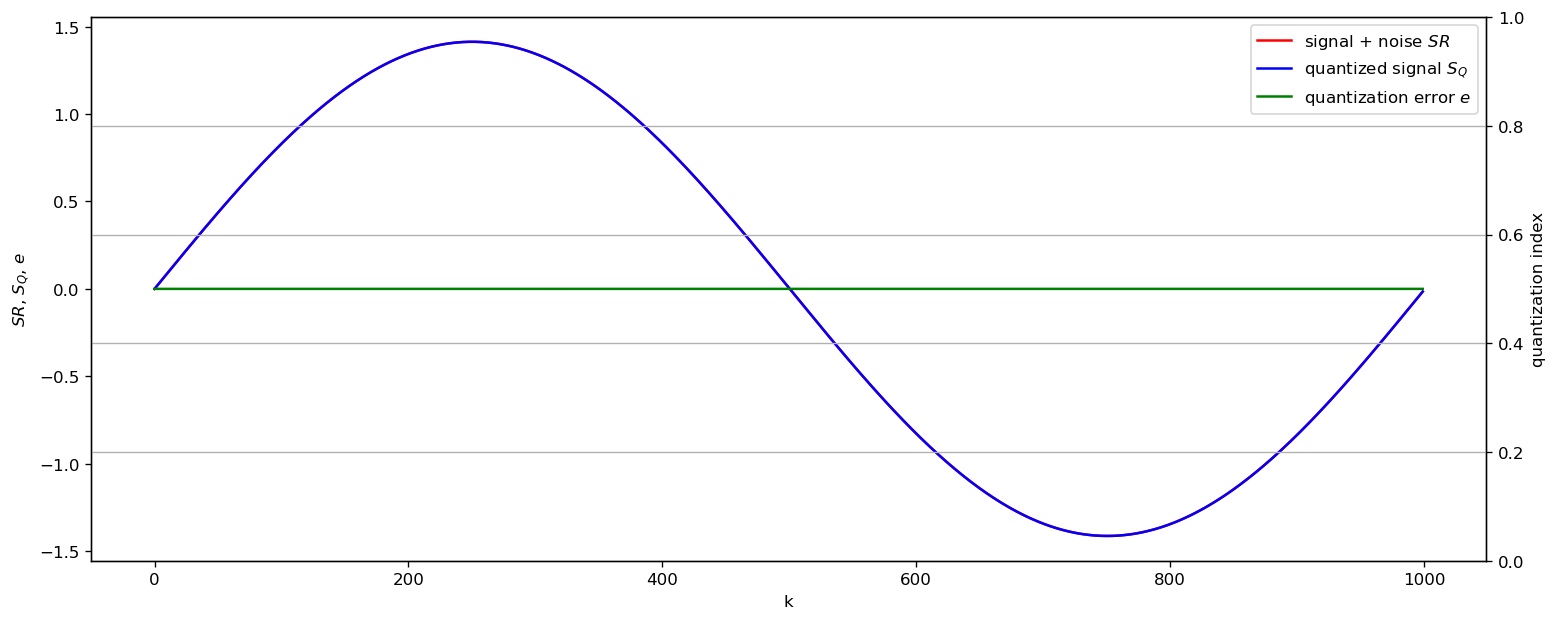

In [11]:
# b.7) B=16 , Kn= 1/10
B = 16
kn = 1/10
q = Vf/2**B # Volts
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)
sr = analog_sig + nn
sr = sr[::over_sampling]
srq = q * np.round(sr/q)
nq = srq - sr

plt.close('all')
 
plt.figure(22)
figure(figsize=(15, 6), dpi=120)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(23)
figure(figsize=(15, 6), dpi=120)
ft_As = 1/N*np.fft.fft(analog_sig,axis=0)
ft_SR = 1/N*np.fft.fft(sr,axis=0)
ft_Nq = 1/N*np.fft.fft(nq,axis=0)
ft_Nn = 1/N*np.fft.fft(nn,axis=0)
ft_Srq =1/N*np.fft.fft(srq,axis=0)

bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(24)
figure(figsize=(15, 6), dpi=120)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))


# Agregado:

# señal + ruido:
x = sr
# señal con cuantizaion:
xQ = srq
# señal de error:
e = xQ - x

fig, ax1 = plt.subplots(figsize=(15, 6), dpi=120)
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal + noise $SR$')
ax1.plot(xQ, 'b', label=r'quantized signal $S_Q$')
ax1.plot(e, 'g', label=r'quantization error $e$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR$, $S_Q$, $e$')
ax1.legend()
ax2.set_ylabel('quantization index')
ax2.grid()

SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' % SNR)
    

<Figure size 432x288 with 0 Axes>

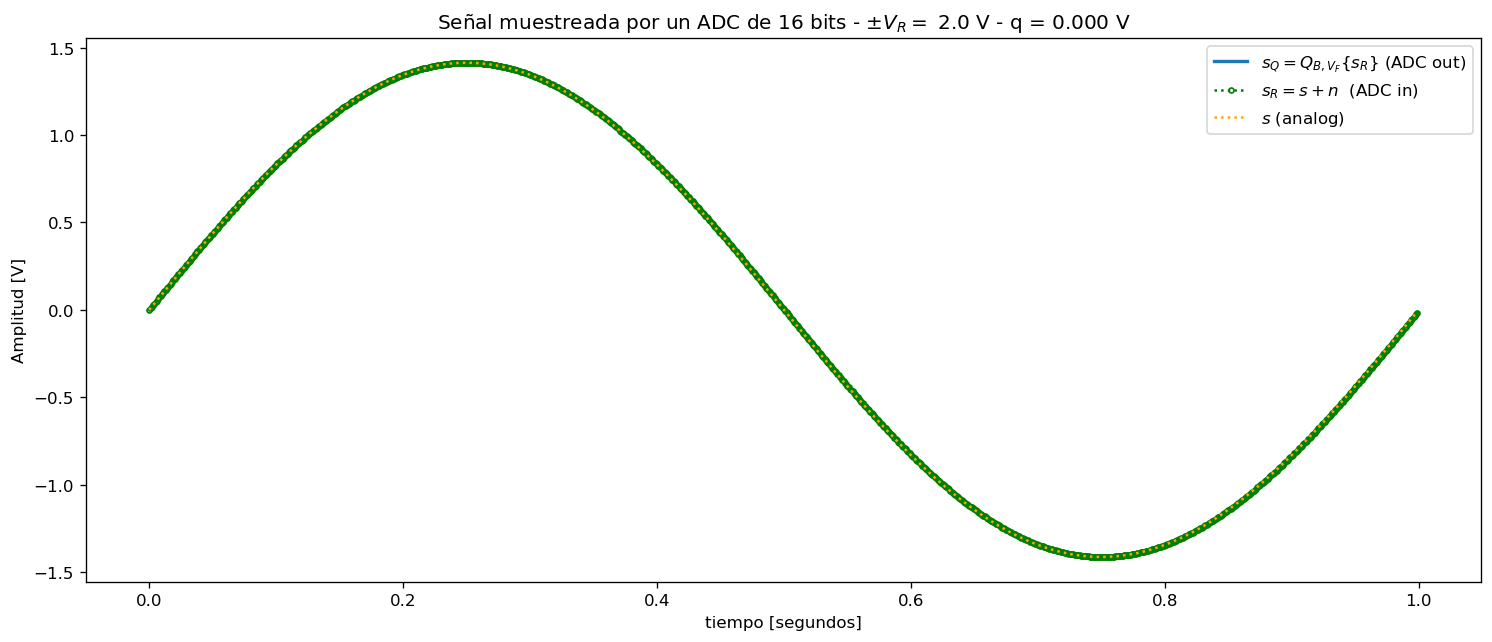

SNR = 101.058581 in dB


<Figure size 432x288 with 0 Axes>

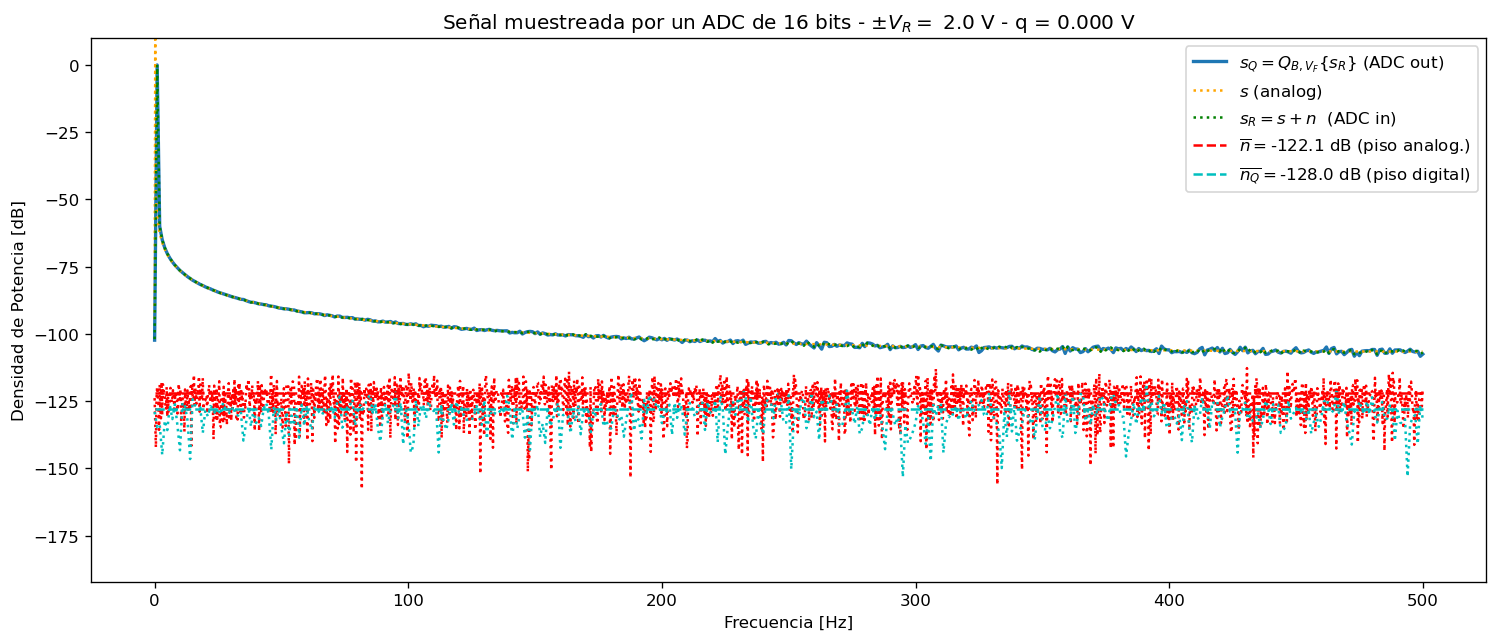

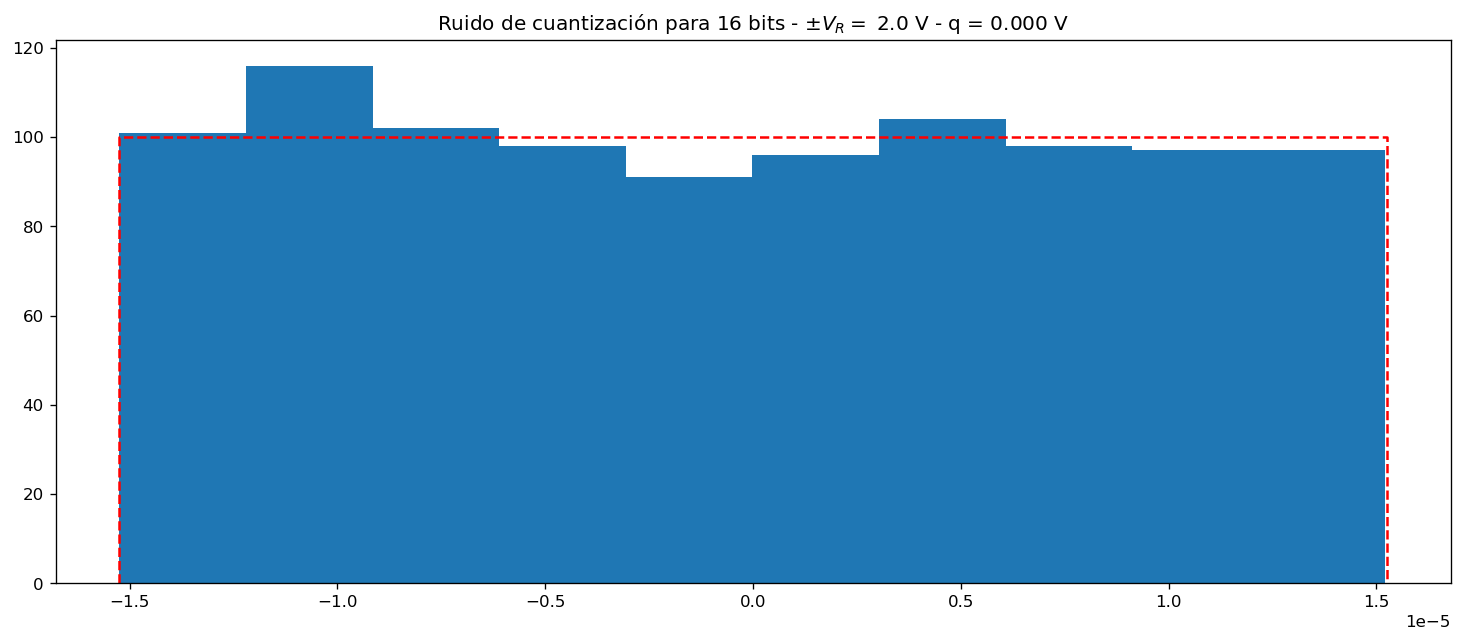

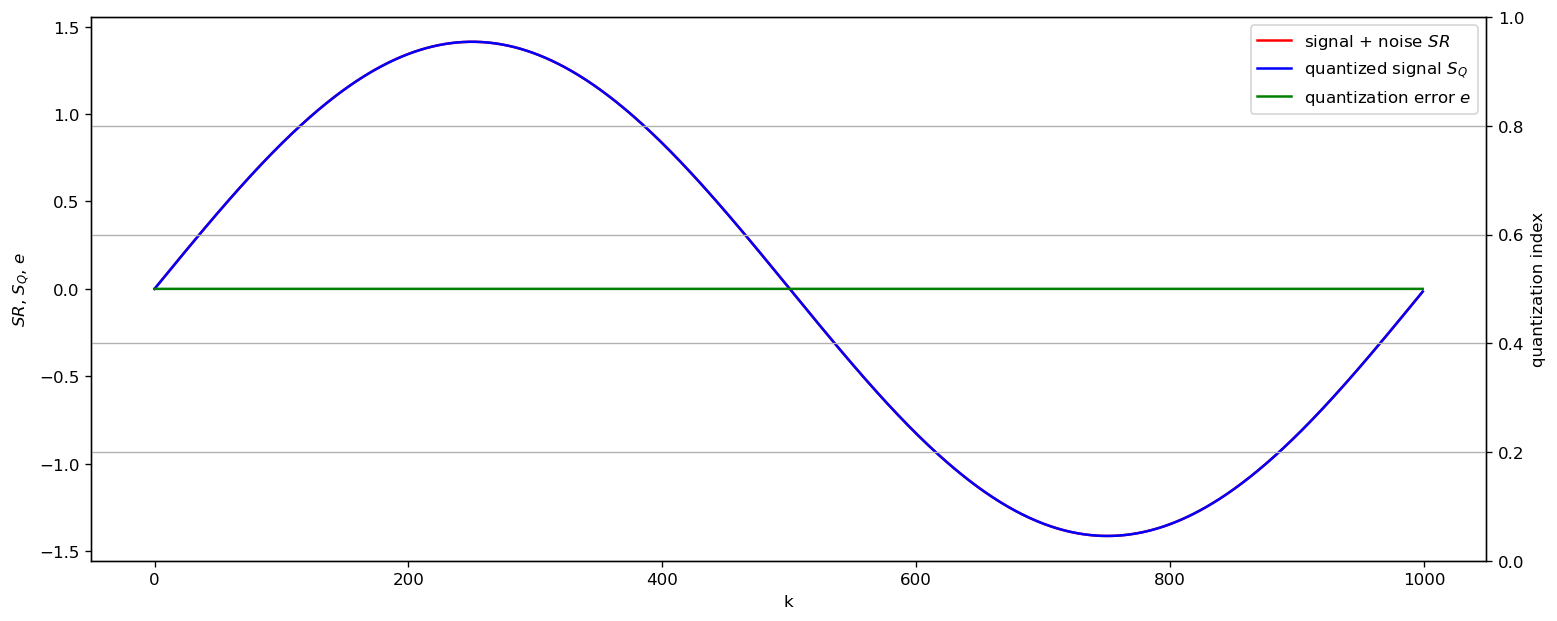

In [12]:
# b.8) B=16 , Kn= 1
B = 16
kn = 1
q = Vf/2**B # Volts
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)
sr = analog_sig + nn
sr = sr[::over_sampling]
srq = q * np.round(sr/q)
nq = srq - sr

plt.close('all')
 
plt.figure(25)
figure(figsize=(15, 6), dpi=120)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(26)
figure(figsize=(15, 6), dpi=120)
ft_As = 1/N*np.fft.fft(analog_sig,axis=0)
ft_SR = 1/N*np.fft.fft(sr,axis=0)
ft_Nq = 1/N*np.fft.fft(nq,axis=0)
ft_Nn = 1/N*np.fft.fft(nn,axis=0)
ft_Srq =1/N*np.fft.fft(srq,axis=0)

bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(27)
figure(figsize=(15, 6), dpi=120)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

# Agregado:

# señal + ruido:
x = sr
# señal con cuantizaion:
xQ = srq
# señal de error:
e = xQ - x

fig, ax1 = plt.subplots(figsize=(15, 6), dpi=120)
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal + noise $SR$')
ax1.plot(xQ, 'b', label=r'quantized signal $S_Q$')
ax1.plot(e, 'g', label=r'quantization error $e$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR$, $S_Q$, $e$')
ax1.legend()
ax2.set_ylabel('quantization index')
ax2.grid()

SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' % SNR)
    

<Figure size 432x288 with 0 Axes>

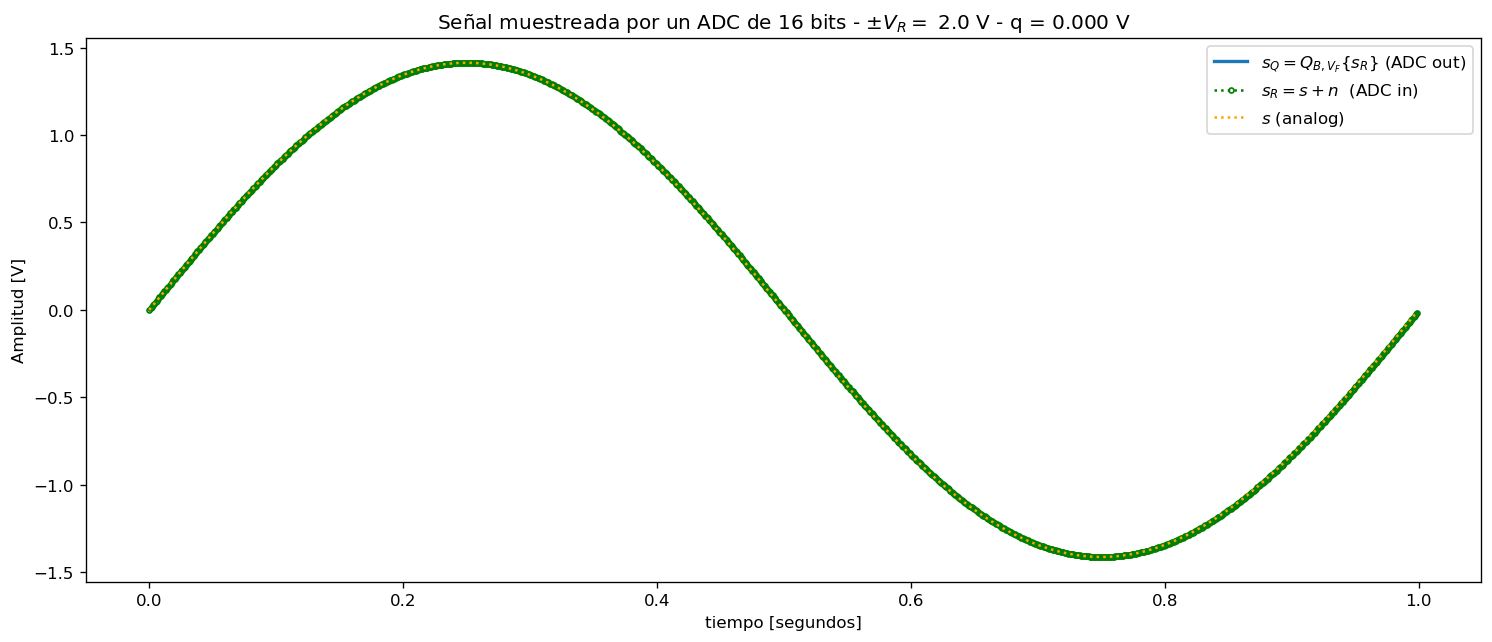

SNR = 100.898663 in dB


<Figure size 432x288 with 0 Axes>

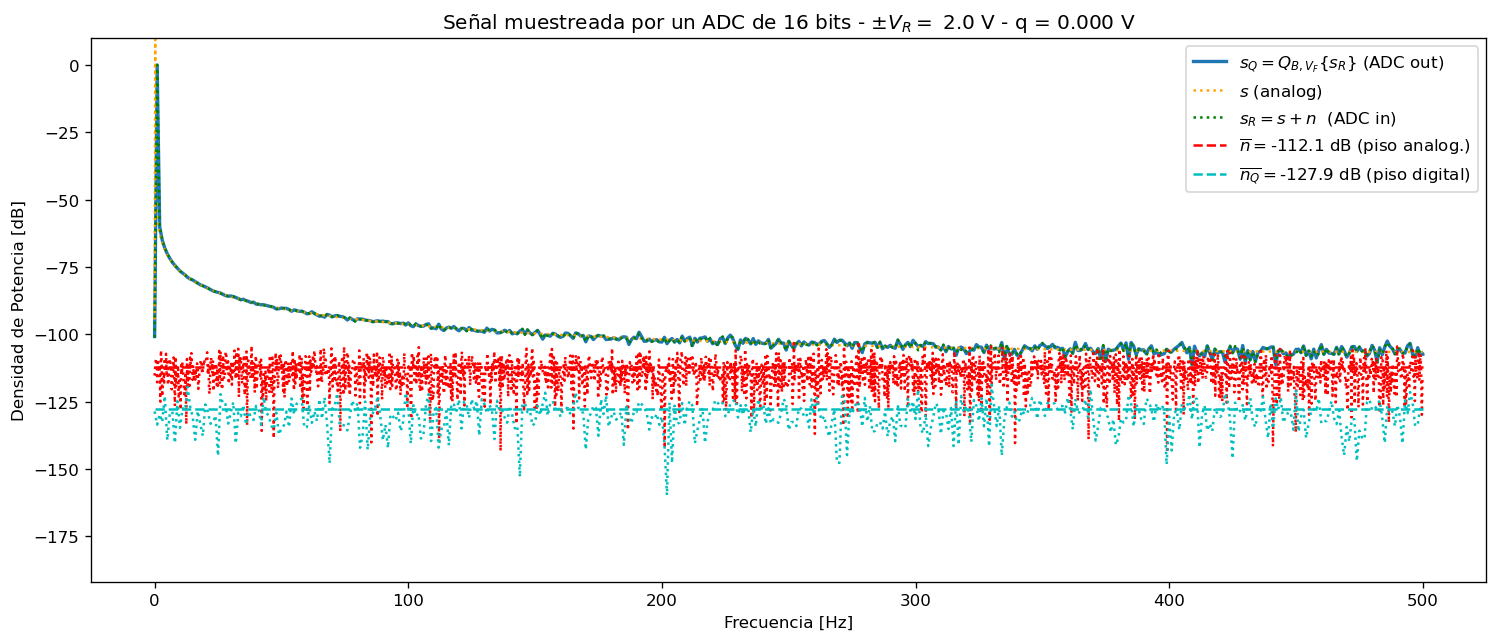

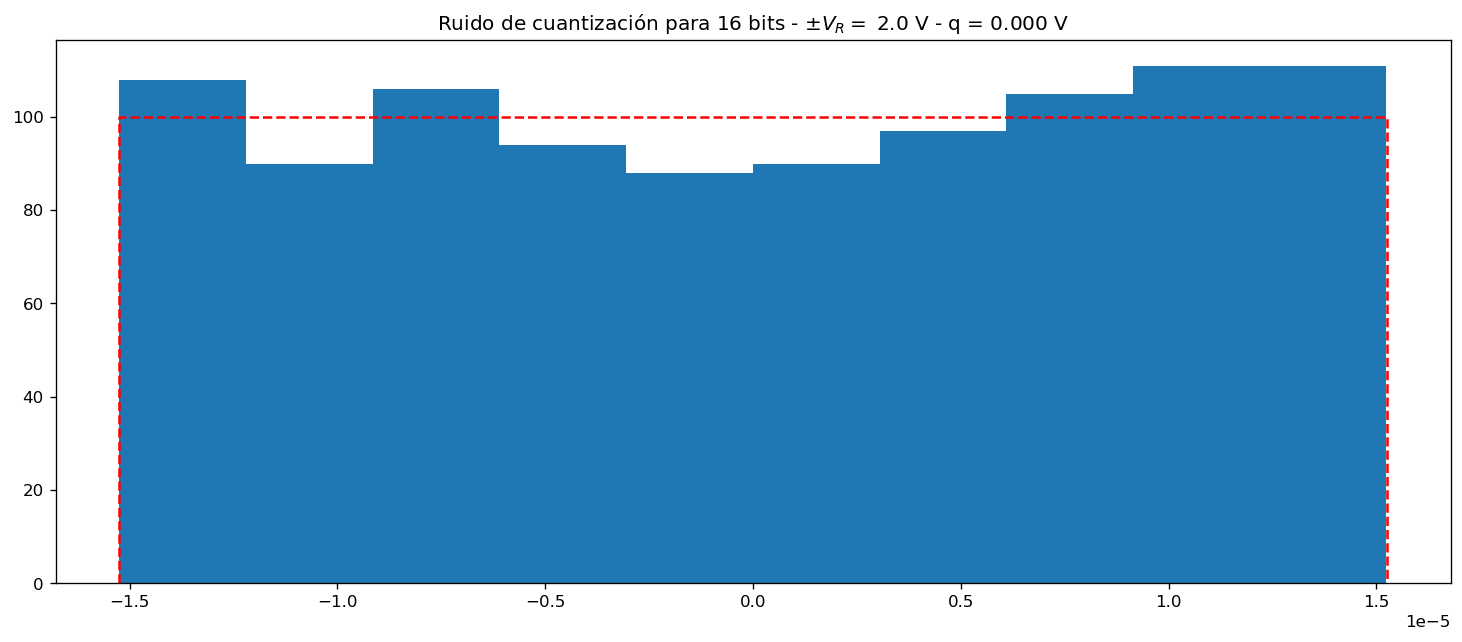

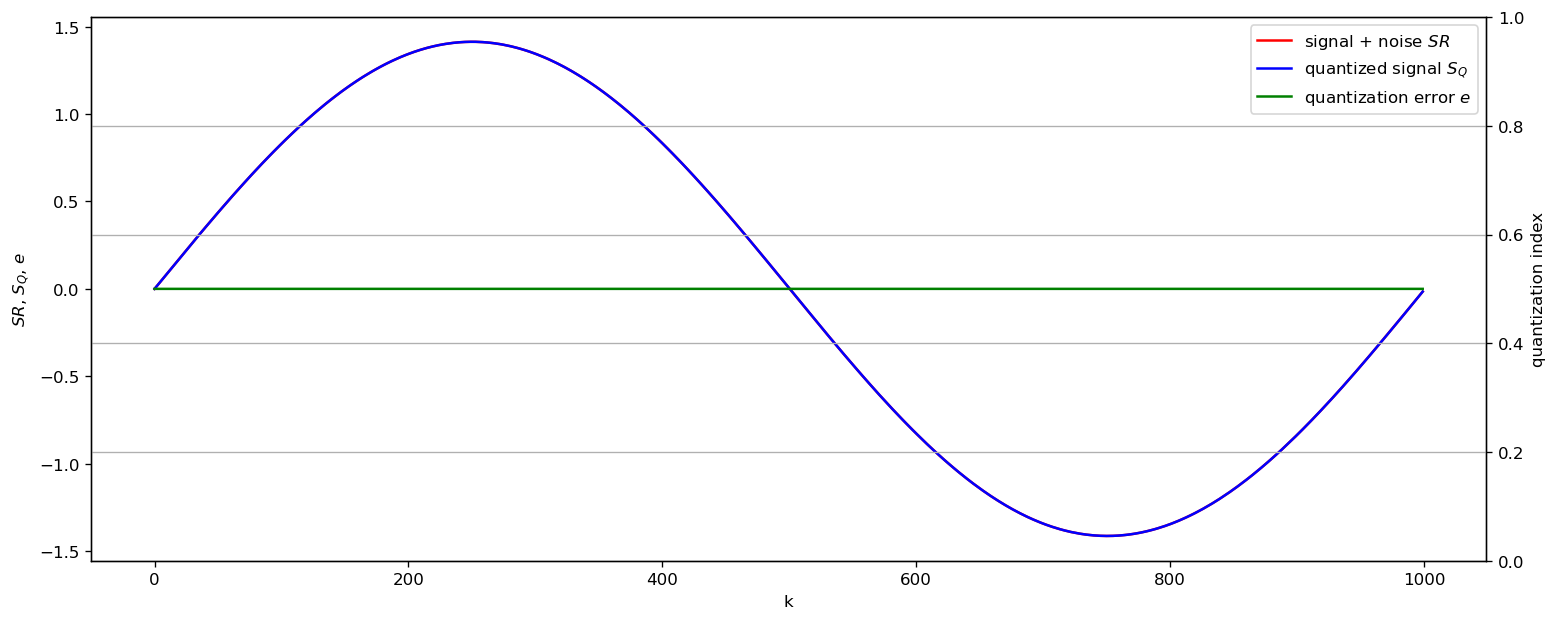

In [13]:
# b.9) B=16 , Kn= 10
B = 16
kn = 10
q = Vf/2**B # Volts
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
nn = np.random.normal(0,np.sqrt(pot_ruido),size=N_os)
nn = nn/np.sqrt(np.var(nn))*np.sqrt(pot_ruido)
sr = analog_sig + nn
sr = sr[::over_sampling]
srq = q * np.round(sr/q)
nq = srq - sr

plt.close('all')
 
plt.figure(28)
figure(figsize=(15, 6), dpi=120)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(29)
figure(figsize=(15, 6), dpi=120)
ft_As = 1/N*np.fft.fft(analog_sig,axis=0)
ft_SR = 1/N*np.fft.fft(sr,axis=0)
ft_Nq = 1/N*np.fft.fft(nq,axis=0)
ft_Nn = 1/N*np.fft.fft(nn,axis=0)
ft_Srq =1/N*np.fft.fft(srq,axis=0)

bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(30)
figure(figsize=(15, 6), dpi=120)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))

# Agregado:

# señal + ruido:
x = sr
# señal con cuantizaion:
xQ = srq
# señal de error:
e = xQ - x

fig, ax1 = plt.subplots(figsize=(15, 6), dpi=120)
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'signal + noise $SR$')
ax1.plot(xQ, 'b', label=r'quantized signal $S_Q$')
ax1.plot(e, 'g', label=r'quantization error $e$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR$, $S_Q$, $e$')
ax1.legend()
ax2.set_ylabel('quantization index')
ax2.grid()

SNR = 10*np.log10((np.var(x)/np.var(e)))
print('SNR = %f in dB' % SNR)
    